<a href="https://colab.research.google.com/github/Gauranga2022/Fun-with-Python/blob/main/LAA_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this assignment you will explore the application of SVD to an image classification problem. MNIST set is a large collection of handwritten digits. It is a very popular dataset in the field of image processing. It is often used for benchmarking machine learning algorithms. It has a collection of 70, 000, 28 × 28 images of handwritten digits from 0 to 9. The dataset is already divided into training and testing sets. You can import the dataset using the Keras module. Each image is stored as vector (by unwrapping the image matrix); the first coordinate is the label (i.e., a number between 0 to 9 indicating the digit whose image the vector represents). You can print/display the image using pyplot, by wraping it using “ reshape(28, 28)”. Spend some time to get familiar with this dataset.
1. For each digit i form a matrix whose columns are images of that digit. Make sure that the label is not part your column; i.e., there are exactly 784 rows in each column. The dataset contains 4, 000 images of each of the digits. You may decide to take them all in your matrices or you may choose a fixed number N (sufficiently big) columns for each digit.
2. The 10 matrices formed above are in general not of full rank. For instance, consider the matrix D5 containing images labeled 5. The columns span a proper subspace D(5) ⊂ R 784 that would contain all 28×28 images of 5. So, given a test image e if we find an algorithm that detects whether e is in D(5) or not would lead us to a model that would solve the classification problem.
3. For each of this matrix D(n) write a routine to extract the first 4 left singular vectors (i.e., the principal components). You may call function provided by numpy. Recall that these are orthonormal basis vectors of the column space of D(n). Now for each digit print 5 images - the first image should be from the training data sets and for the remaining use the left singular vectors (by reshaping them into 28 × 28 image).
4. Finally, the classification stage. Develop your model using the following idea. Given a test image, as a vector z, one woould like to compute
ρn(z) := min ||D(n)x − z||, where n is a digit between 0 to 9. The value of n for which ρn(z) is the least should be the label of z. It should be clear to you that using the full matrix D(n) to solve the LSP is ineffecient. This is where SVD should enter, i.e., instead of D(n) you should use a low rank approximation of the factorization. Further hint, try using only first 4 or so columns of U. Moreover, we are not really interested in finding an x that minimizes the expression, we are interested in finding the minimum norm.
5. Try using between 2500 − −3000 images of each digit in the training set to form the matrices and use the remaining as (labeled) test images.
6. The final output should contain 50 images (from Point 3 above) - one original image and 4 images corresponding to left singular vector. As markdown include the exact expression used in clssification and some justification as to why you are using that particular expression. Also, the confusion matrix and the efficiancy results.

> Note: Your submission should be a PDF output of your Juypter Notebook and the python files. Make sure that unnecessary things like, error messages, trial runs etc. are not included in the submission. Do upload a compressed archive. Make sure that a PDF file is uploaded.

## Import Libraries

In [48]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Functions

### Plot Singular Vectors Function

This function plots the singular vectors for each digit based on the provided digit matrices and training images.

### Function Description:

The function `plot_singular_vectors` takes three arguments:
- `digit_matrices`: A dictionary containing the matrices for each digit.
- `train_images`: A numpy array containing training images.
- `train_labels`: A numpy array containing corresponding labels for training images.

### Steps:

1. **Loop through Each Digit ($0$ to $9$):**
   - For each digit, obtain the digit matrix and perform Singular Value Decomposition ($SVD$) to get the left singular vectors.
   
2. **Plot Original Image:**
   - Plot the original image corresponding to the current digit as the first subplot.
   
3. **Plot Left Singular Vectors:**
   - For the first four left singular vectors obtained from SVD:
     - Reshape each left singular vector into a 28\times28 image.
     - Plot each left singular vector as a subplot.
   
4. **Display Plots:**
   - Show all the subplots for the current digit.

### Mathematical Explanation:

The left singular vectors obtained from $SVD$ represent the directions of maximum variance in the digit data. These vectors capture important features of the digit images. By plotting these vectors, we can visualize the dominant patterns or features that distinguish one digit from another.

The SVD of a digit matrix  $A$  is given by:
$A =$ $U$ $\Sigma$ $V^T$

Where:
-   $U$   contains the left singular vectors,
-   $\Sigma$   is a diagonal matrix containing the singular values, and
-   $V^T$   contains the right singular vectors.

Thus, each column of matrix   $U$   represents a left singular vector.Reshaping these vectors into $28\times28$ images allows us to visualize the features captured by each singular vector.

Let's say   $u_i$   is the   $i$  -th left singular vector corresponding to the   $i$  -th column of matrix   $U$  . Reshaping   $u_i$   into a $28\times28$ image gives us the visual representation of the   $i^{th}$  dominant feature or pattern associated with the digit.


In [ ]:
def plot_singular_vectors(digit_matrices, train_images, train_labels): #function to plot the singular vectors
    for digit in range(10):
        digit_matrix = digit_matrices[digit]
        U, _, _ = np.linalg.svd(digit_matrix)

        # Plot the original image
        plt.figure(figsize=(20, 20))
        plt.subplot(1, 5, 1)
        plt.imshow(train_images[train_labels == digit][0], cmap='gray')
        plt.title("Original")
        plt.axis('off')

        # Plot the first four left singular vectors
        for i in range(4):
            left_singular_vector = U[:, i]
            image = left_singular_vector.reshape(28, 28)
            plt.subplot(1, 5, i + 2)
            plt.imshow(image, cmap='gray')
            plt.title(f"left singular vector {i+1}")
            plt.axis('off')
        plt.show()

### Function lowRankappx
The function $\textit{lowRankappx}$ below computes the low-rank approximations of digit images for a specified digit $d$. It first defines a list of desired ranks for approximation and obtains the digit matrix corresponding to $d$. Singular Value Decomposition (SVD) is then performed on the digit matrix to obtain the singular vectors and values. For each image, the original image is displayed followed by its low-rank approximations computed for different ranks using the obtained singular vectors and values. The low-rank approximation captures dominant features of the digit image while reducing noise and dimensionality.


In [47]:
def lowRankappx(d, digit_matrices, num_images=5):
    k_list = [10, 50, 100, 200, 400, 700]
    num_k = len(k_list)

    digit_matrix = digit_matrices[d]
    U, S, Vt = np.linalg.svd(digit_matrix)

    for i in range(num_images):
        # Original image
        plt.figure(figsize=(20, 4))
        plt.subplot(1, num_k+1, 1)
        original_image = digit_matrix[:, i].reshape(28, 28)
        plt.imshow(original_image, cmap='gray')
        plt.title("Original")
        plt.axis('off')

        for j, k in enumerate(k_list, 1):
            # Low-rank approximation
            low_rank_all = U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :]
            low_rank_image = low_rank_all[:, i].reshape(28, 28)

            plt.subplot(1, num_k+1, j+1)
            plt.imshow(low_rank_image, cmap='gray')
            plt.title(f"Rank {k}")
            plt.axis('off')

        plt.suptitle(f"Low-Rank Approximations for Digit {d}, Image {i+1}", fontsize=16)
        plt.show()

In [ ]:
def SVD(digit_matrix): #dictionary of all SVD for all digits
  dic = {}
  for i in digit_matrix.keys():
    U, _, _ = np.linalg.svd(digit_matrix[i])
    dic[i] = U
  return(dic)

### Function calculate_accuracy_and_confusion_matrix

The function computes the accuracy and constructs a confusion matrix for a given set of test images and their corresponding labels using Singular Value Decomposition ($SVD$) results represented by the matrix $SVD$_$U$. For each test image, the function calculates the minimum distance to the digit space for each digit using the $SVD$ results. It iterates through each digit's space and computes the Euclidean distance between the test image and the digit space represented by the principal components obtained from $SVD$. It updates the confusion matrix by incrementing the count for the predicted digit and the actual label. Additionally, it tracks the total number of correct predictions to compute the accuracy. Finally, it returns the accuracy and the constructed confusion matrix, which shows the count of correct and incorrect predictions for each digit.

#### **Mathematical concept**:

Given a
test image, as a vector $z$, one woould like to compute
$$ρ_{n}(z) := min ||D(n)x − z||$$
where n is a digit between $0$ to $9$. The value of n for which $ρ_{n}(z)$ is the least, should be the label of $z$. It should be clear to you that using the full matrix $D(n)$ to solve the LSP is ineffecient. This is where $SVD$ should enter, i.e., instead of $D(n)$ you should use a low rank approximation of the factorization.

1. $\textbf{Low Rank Approximation}$:
For a specific digit $D_{n}$, we perform a low rank approximation based on its $SVD$. We truncate $U$ to a fixed number of columns (here $=4$). Let the low rank approximation be denoted as $U_{n_{apprx}}$. We take into consideration its transpose  $U_{n_{apprx}}^T$

2. $\textbf{Classification}$:
To classify a new image $z$, we calculate, ∀ n :
$$ρ_{n}(z) := min ||U_{n_{apprx}} U_{n_{apprx}}^T z − z||$$
The label of the image, $z$ is assigned based on the value of n for which the quantity  $ρ_{n}(z)$ is minimised

In [30]:
def calculate_accuracy_and_confusion_matrix(test_images, test_labels, SVD_U):
    confusion_matrix = np.zeros((10, 10), dtype=int)
    total_correct = 0
    total_samples = len(test_images)

    for i in range(total_samples):
        z = test_images[i].reshape(784, 1)
        min_index = -1
        min_dist = float('inf')

        # Find the minimum distance to the digit space
        for j in range(10):
            mat = SVD_U[j] @ SVD_U[j].T @ z - z
            norm = np.linalg.norm(mat)
            if norm < min_dist:
                min_dist = norm
                min_index = j

        confusion_matrix[test_labels[i]][min_index] += 1

        if min_index == test_labels[i]:
            total_correct += 1

    accuracy = total_correct / total_samples

    return accuracy, confusion_matrix

In [31]:
def plot_confusion_matrix(confusion_matrix):
    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, np.arange(10))
    plt.yticks(tick_marks, np.arange(10))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            plt.text(j, i, format(confusion_matrix[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if confusion_matrix[i, j] > confusion_matrix.max() / 2 else "black")

    plt.tight_layout()

    plt.show()

# Body

## Singular Vectors

11490434/11490434 [==============================] - 1s 0us/step


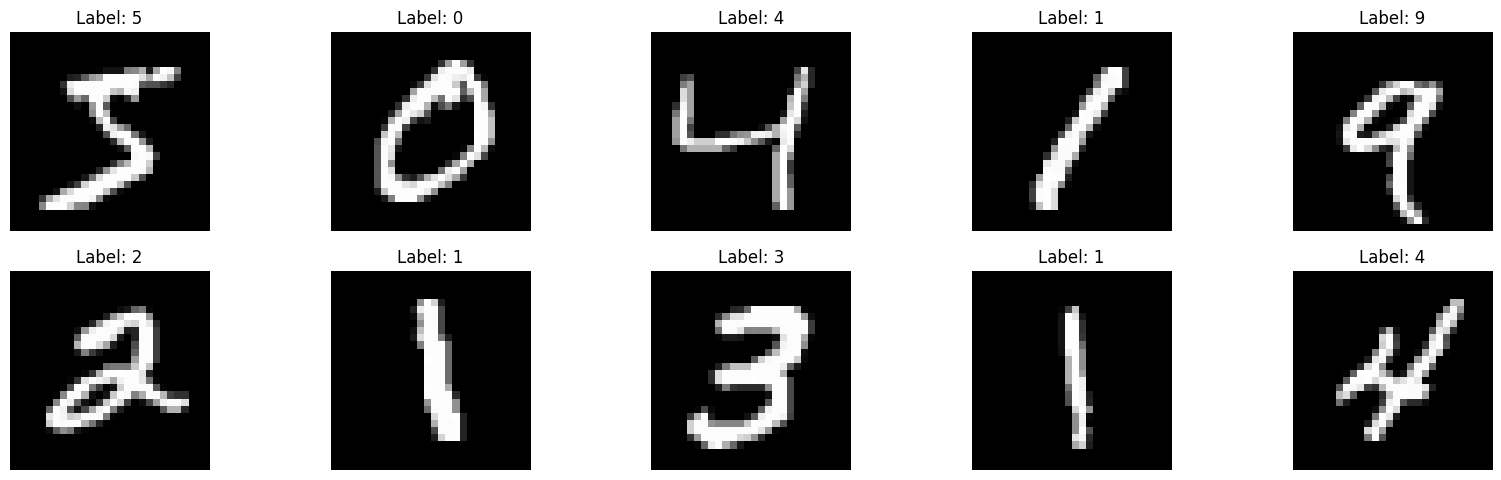

In [ ]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Display some sample images from the training set
plt.figure(figsize=(20, 15))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.show()

60000 28x28 matrices

In [ ]:
sum = 0
for j in range(10):
  count = 0
  for i in range(60000):
    if train_labels[i]==j:
      count+=1
  for i in range(10000):
    if test_labels[i]==j:
      count+=1
  sum += count
  print('number of images of digit', j , '=', count)
print('total =', sum)

number of images of digit 0 = 6903
number of images of digit 1 = 7877
number of images of digit 2 = 6990
number of images of digit 3 = 7141
number of images of digit 4 = 6824
number of images of digit 5 = 6313
number of images of digit 6 = 6876
number of images of digit 7 = 7293
number of images of digit 8 = 6825
number of images of digit 9 = 6958
total = 70000


In [ ]:
digit_matrices = {}

for digit in range(10):
    digit_images = train_images[train_labels == digit]
    digit_images_reshaped = digit_images.reshape(-1, 784).T # Reshape images to have 784 rows (28x28 images unwrapped)
    digit_matrices[digit] = digit_images_reshaped

Digit 0: Matrix shape (784, 5923)
Digit 1: Matrix shape (784, 6742)
Digit 2: Matrix shape (784, 5958)
Digit 3: Matrix shape (784, 6131)
Digit 4: Matrix shape (784, 5842)
Digit 5: Matrix shape (784, 5421)
Digit 6: Matrix shape (784, 5918)
Digit 7: Matrix shape (784, 6265)
Digit 8: Matrix shape (784, 5851)
Digit 9: Matrix shape (784, 5949)


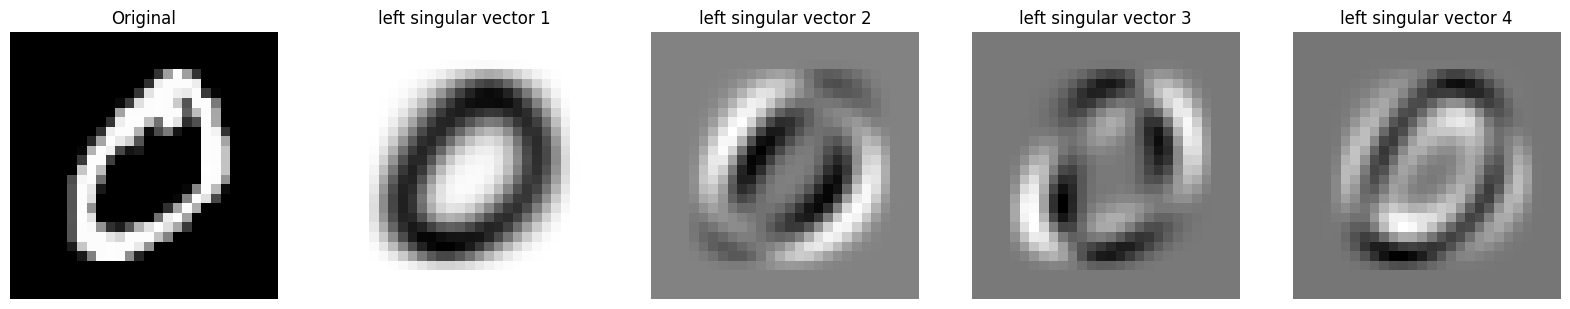

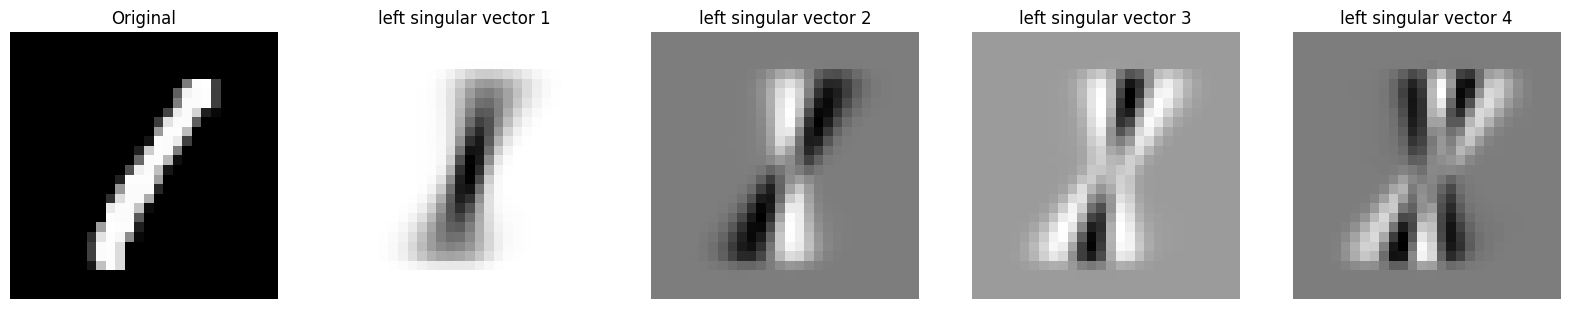

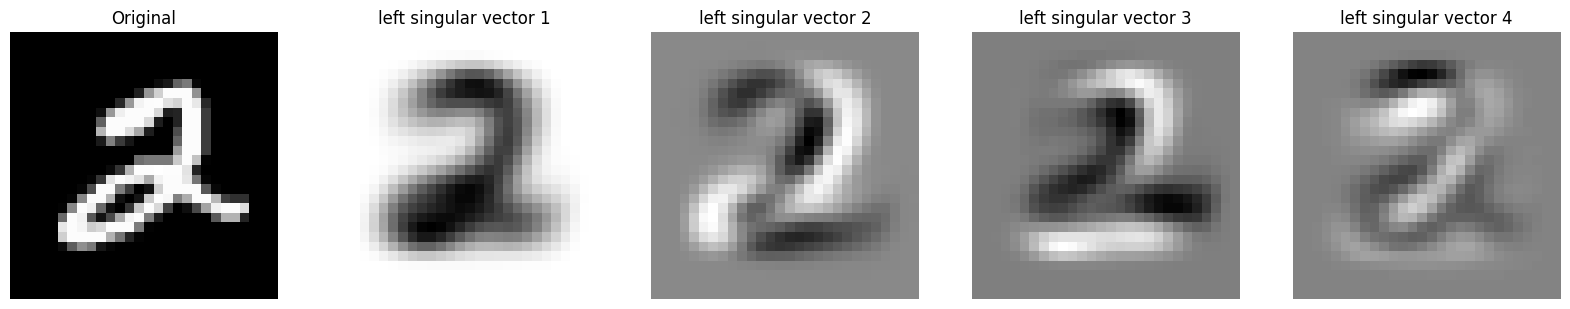

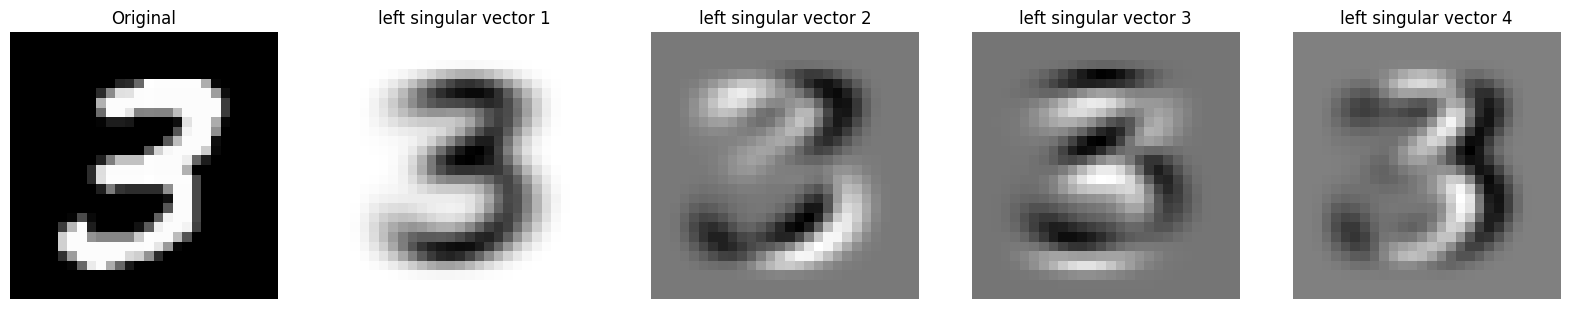

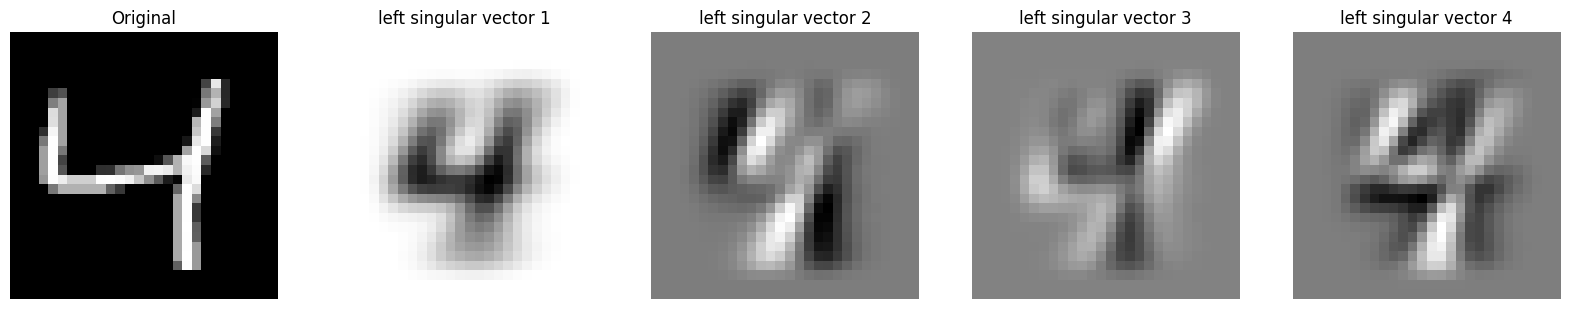

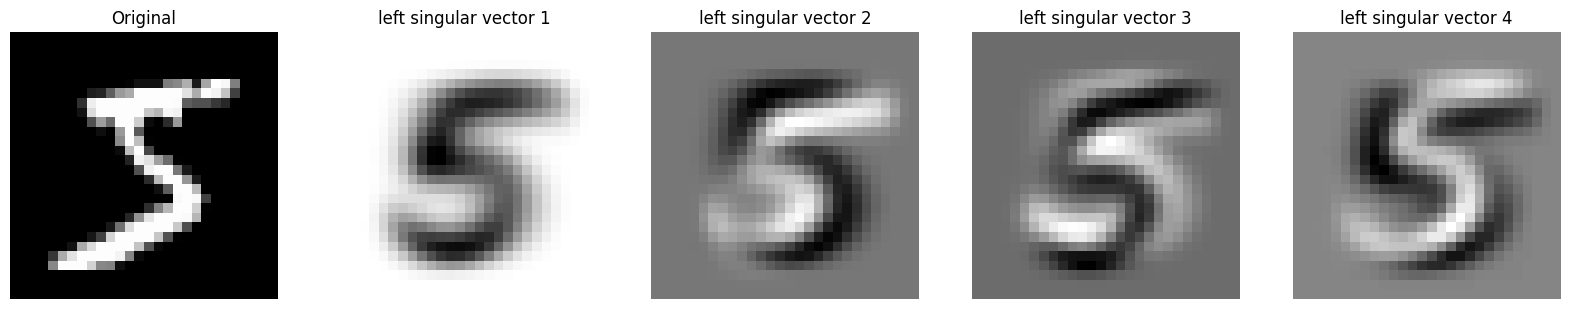

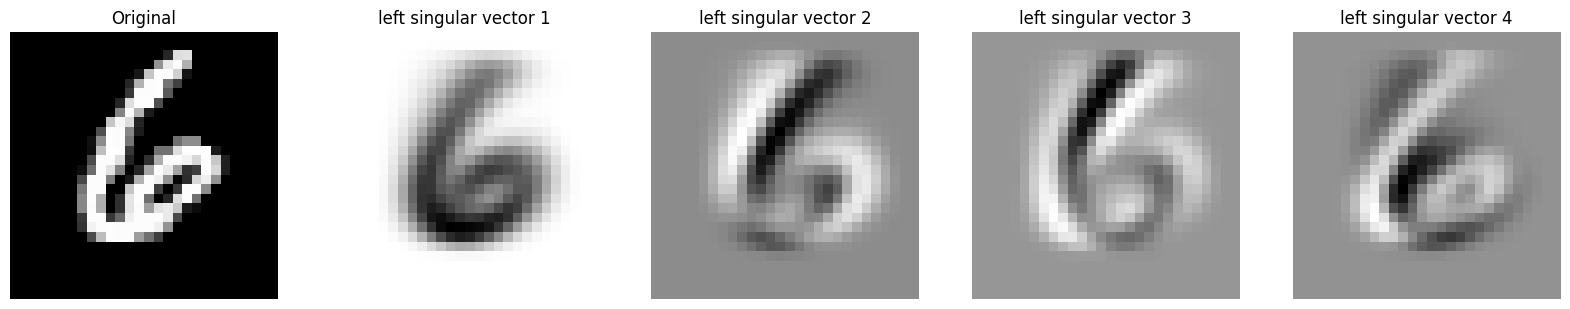

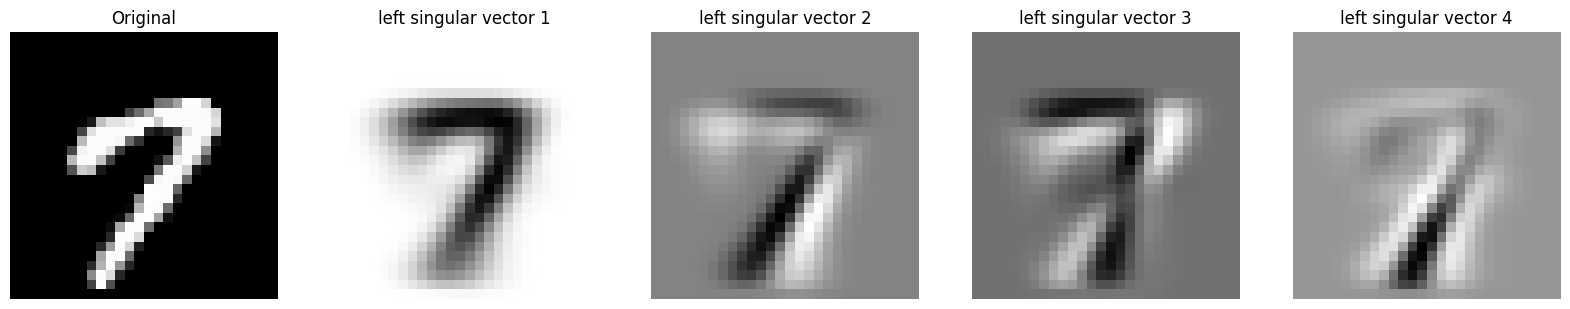

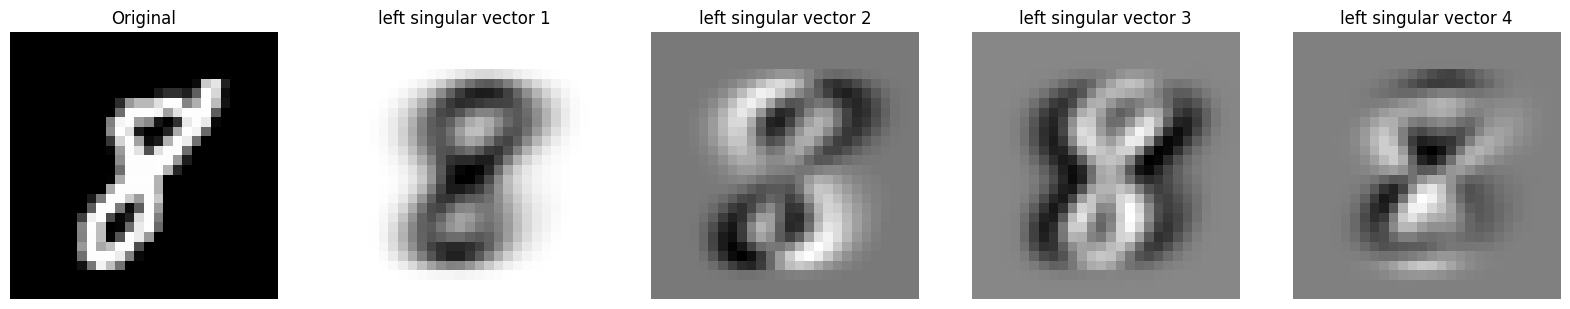

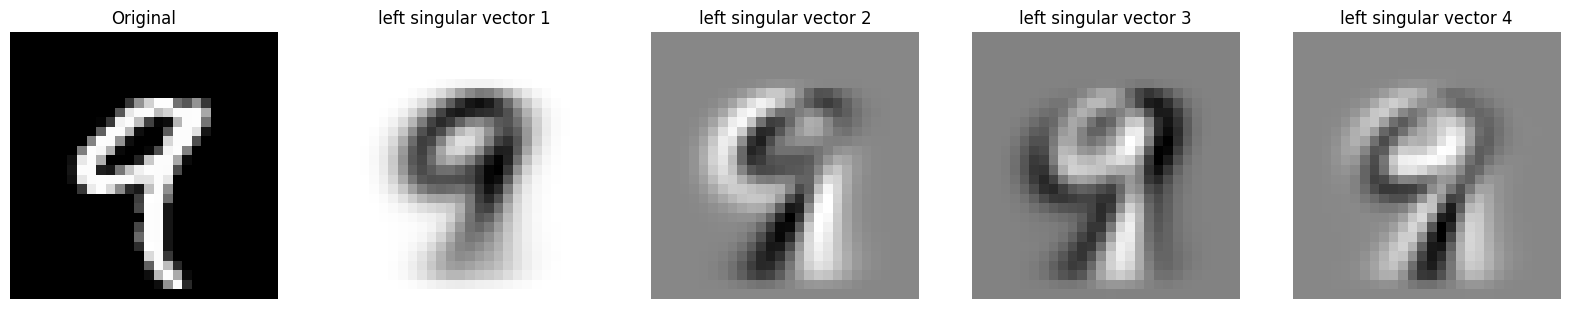

In [ ]:
plot_singular_vectors(digit_matrices, train_images, train_labels)

Text(0, 0.5, 'k th singular value')

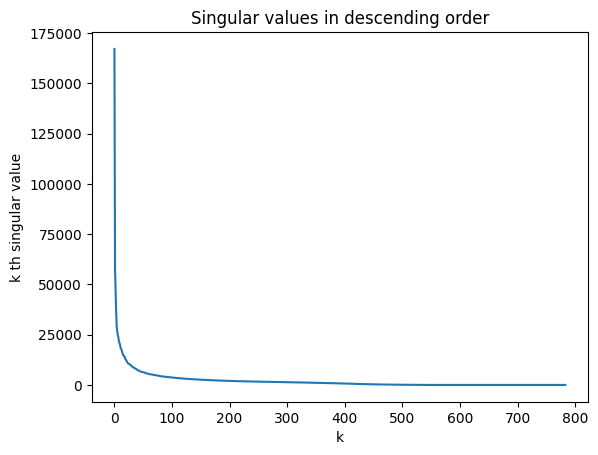

In [ ]:
plt.plot(np.array([i for i in range(784)]),np.array(S))
plt.title("Singular values in descending order")
plt.xlabel("k")
plt.ylabel("k th singular value")

##Testing

In [ ]:
z = test_images[1].reshape(784,1)
SVD_U = SVD(digit_matrices)
reduced_SVD = {}
for i in range(10):
  reduced_SVD[i] = SVD_U[i][:, :4]

In [33]:
accuracy, confusion_matrix = calculate_accuracy_and_confusion_matrix(test_images, test_labels, reduced_SVD)

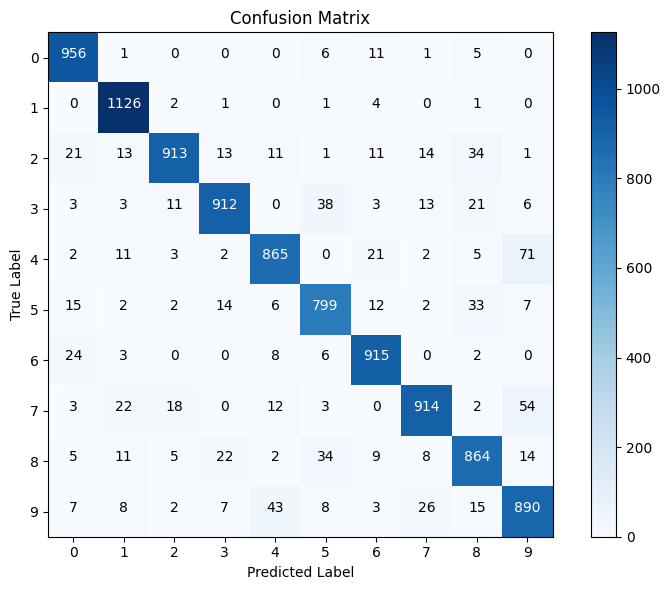

In [34]:
plot_confusion_matrix(confusion_matrix)

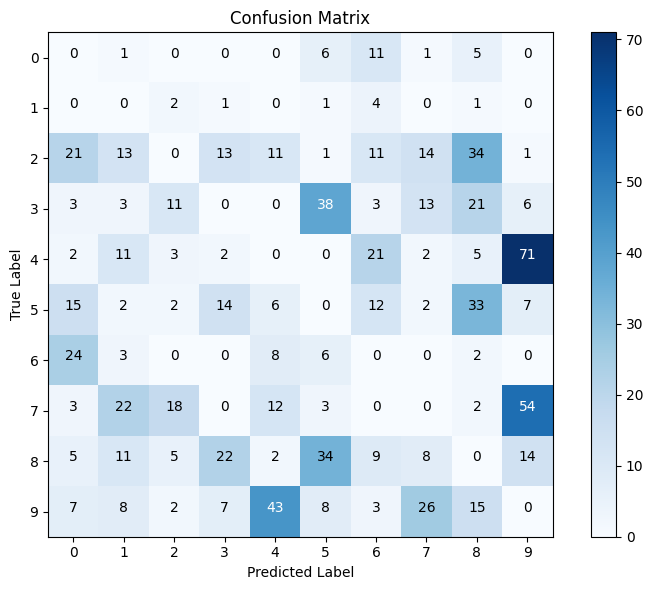

In [35]:
nd_confusion_matrix = confusion_matrix.copy()
for i in range(10):
  nd_confusion_matrix[i][i] = 0

plot_confusion_matrix(nd_confusion_matrix) #confusion matrix without diagonal elements

**For obvious reasons, the following Observations can be made in many cases:**
1. $4$ has been confused for $9$ and vice versa
2. $9$ has been confused for $4$
3. $3$ has been confused for $5$
4. $8$ has been confused for $5$ and vice versa
5. $9$ has been confused for $7$
6. $2$ has been confused for $8$


## Low Rank Approximations

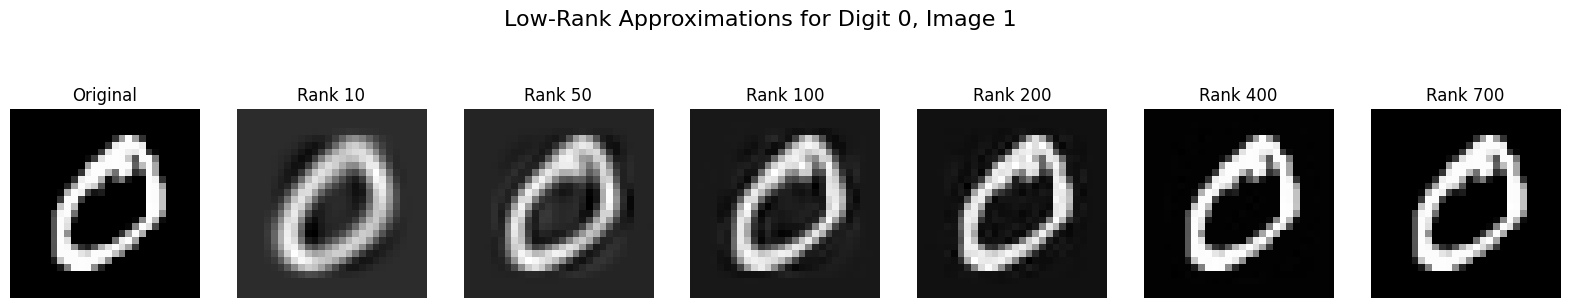

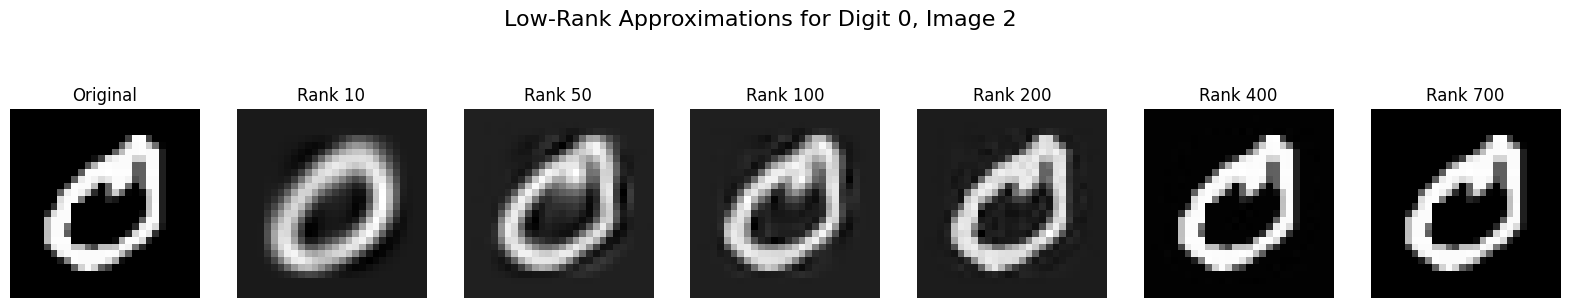

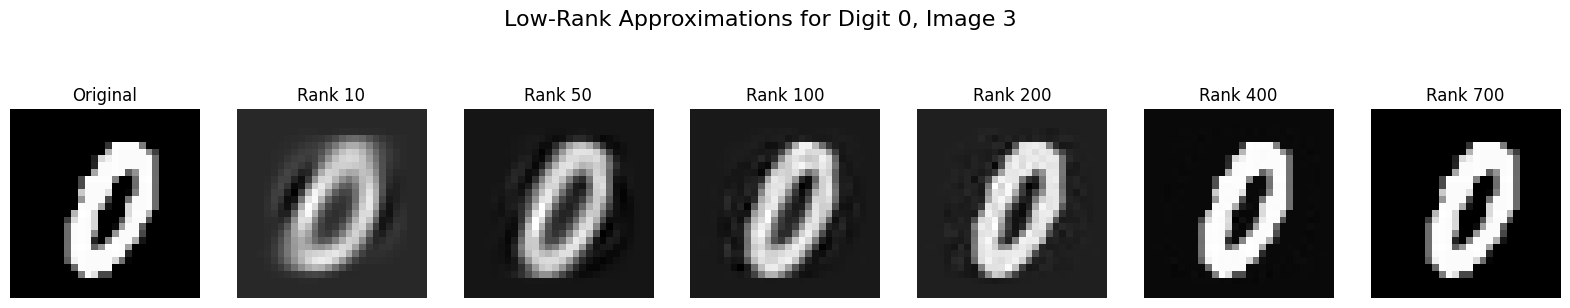

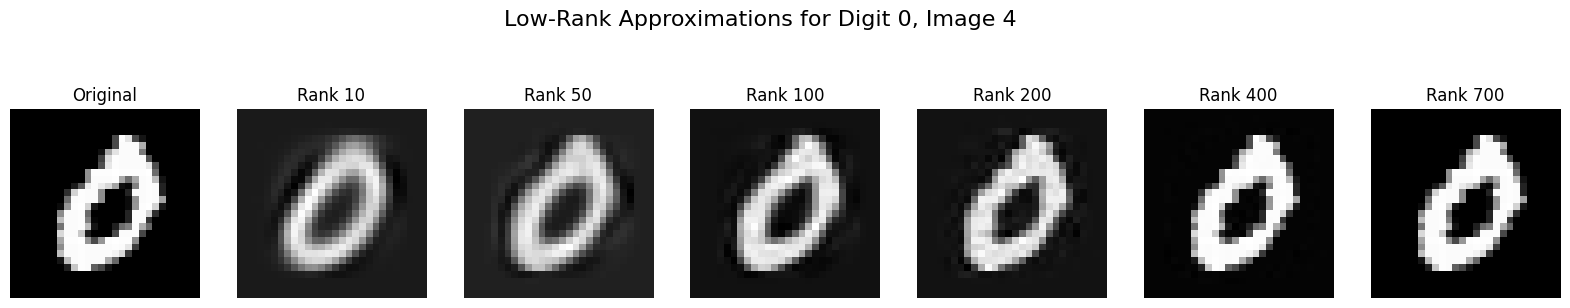

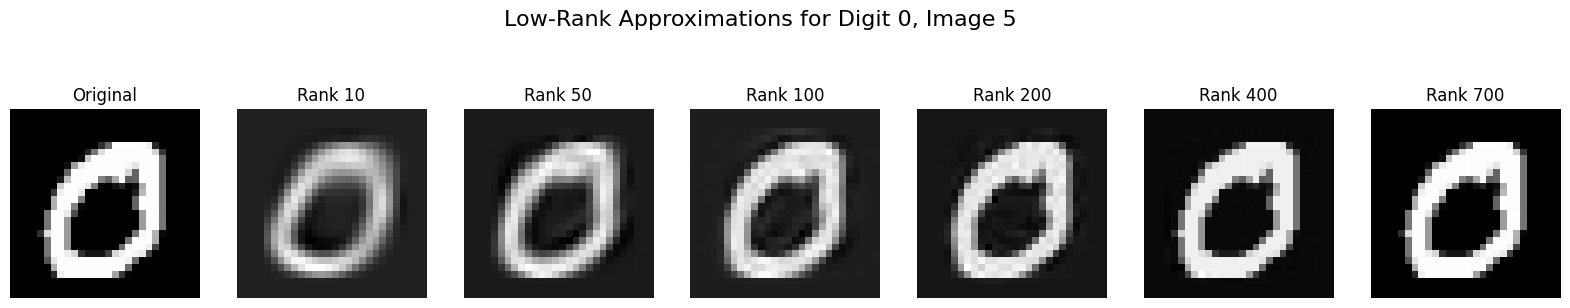

In [37]:
lowRankappx(0, digit_matrices)

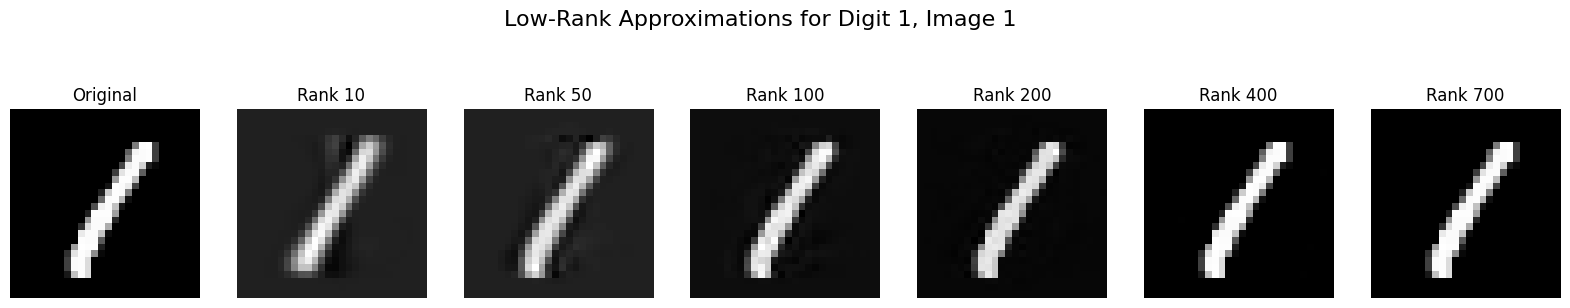

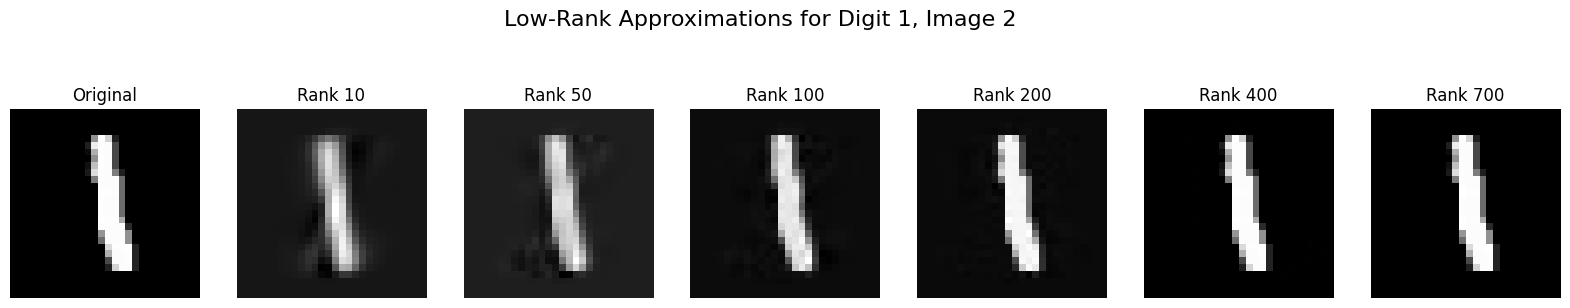

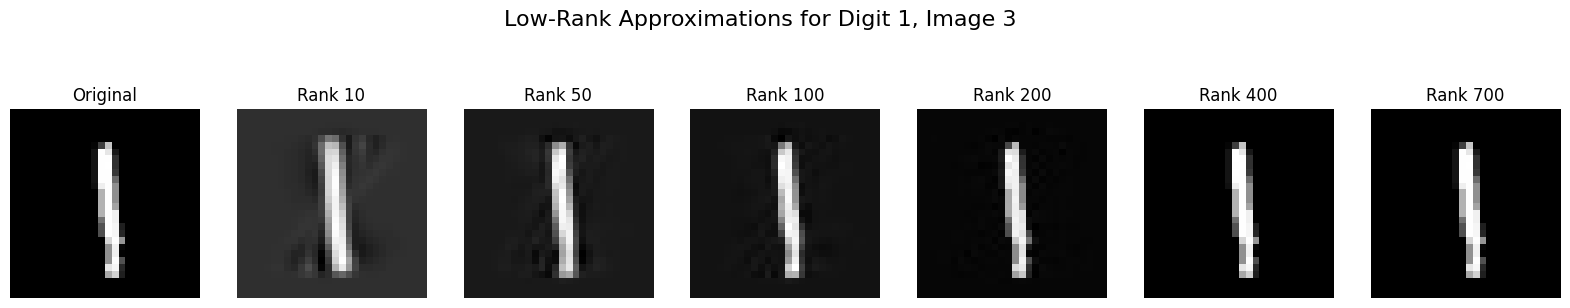

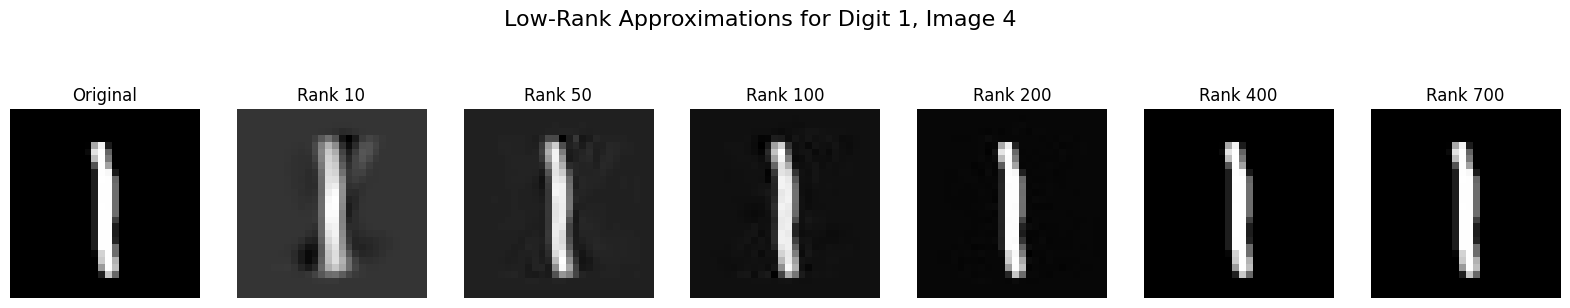

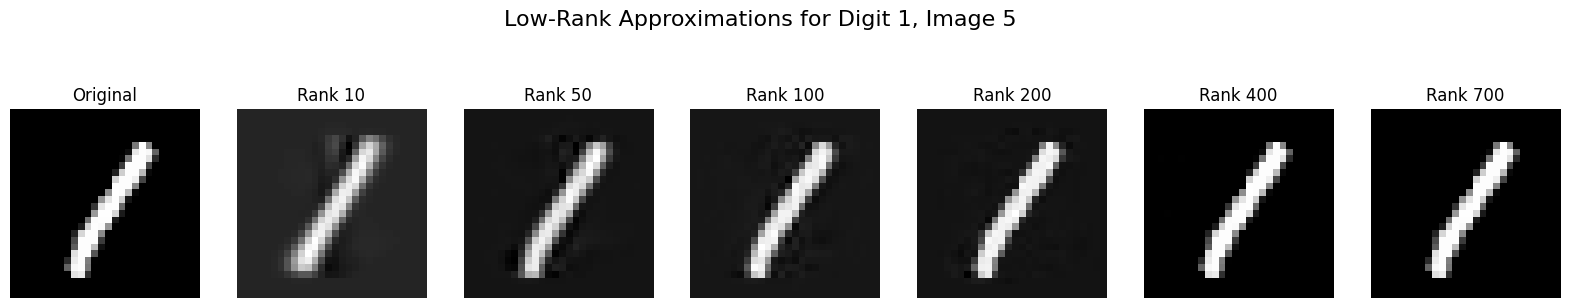

In [38]:
lowRankappx(1, digit_matrices)

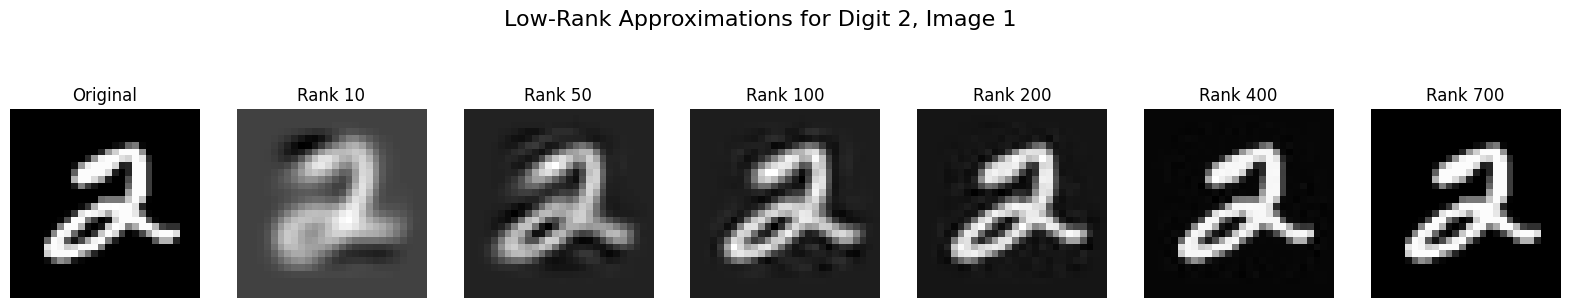

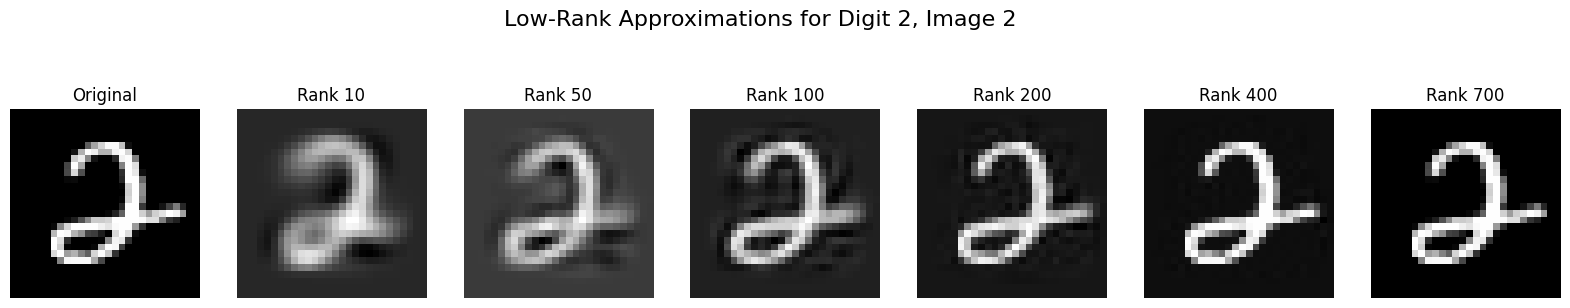

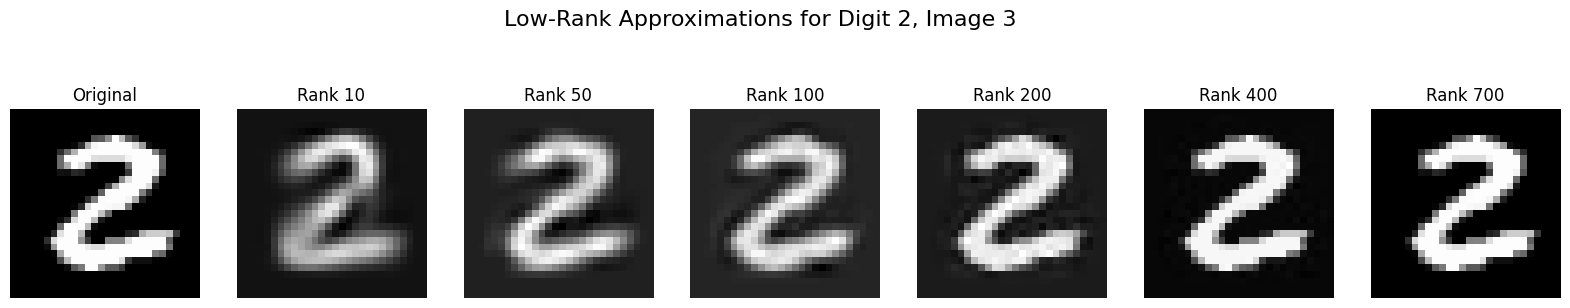

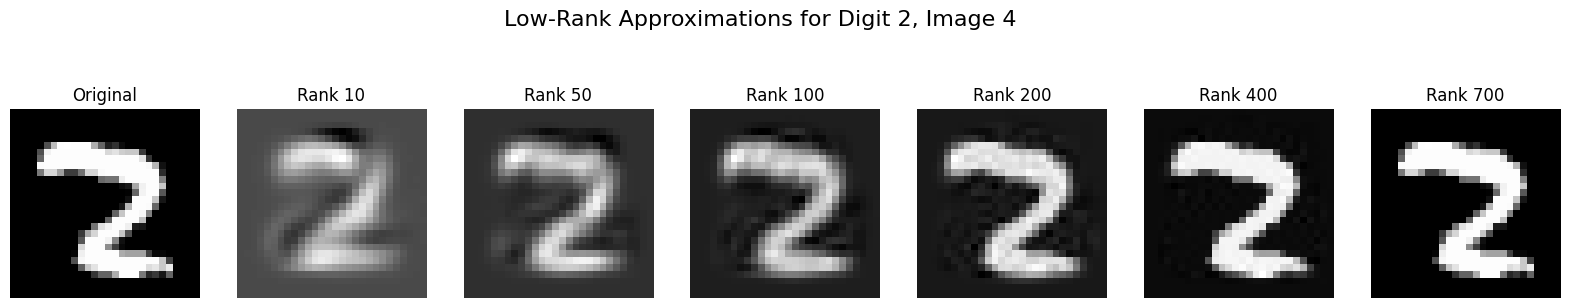

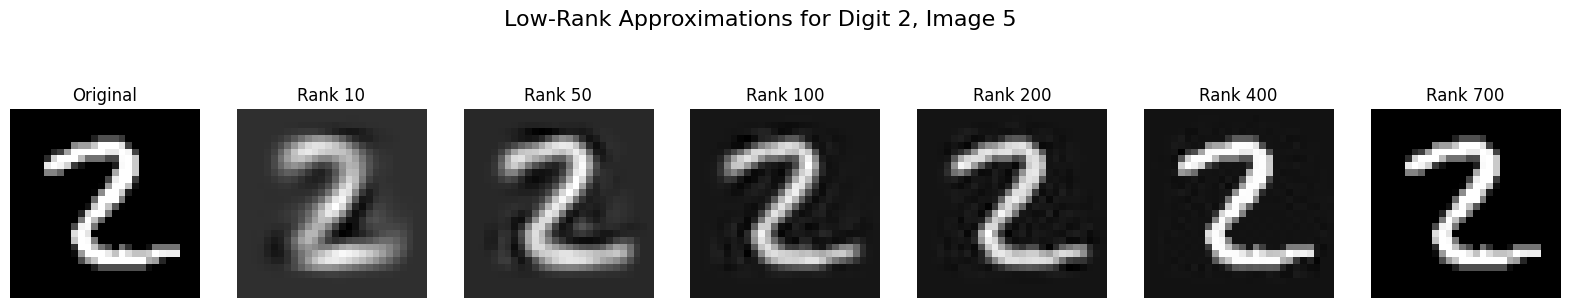

In [39]:
lowRankappx(2, digit_matrices)

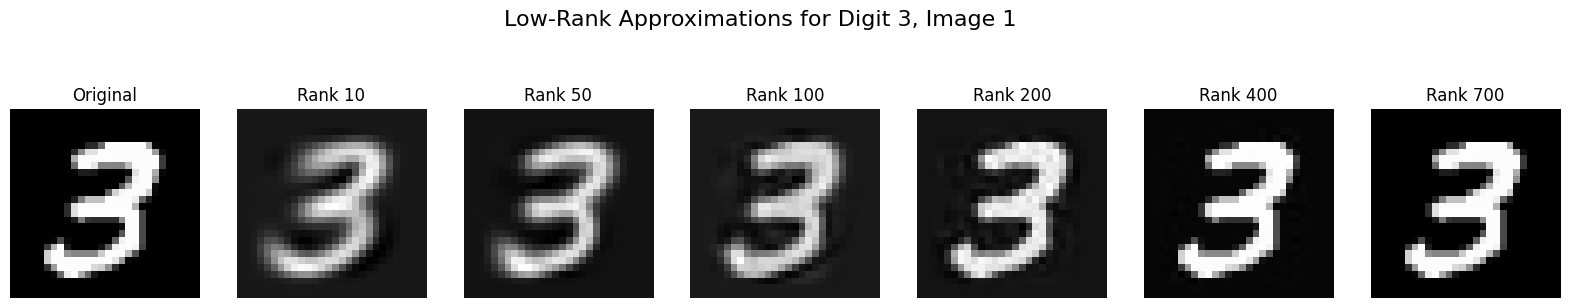

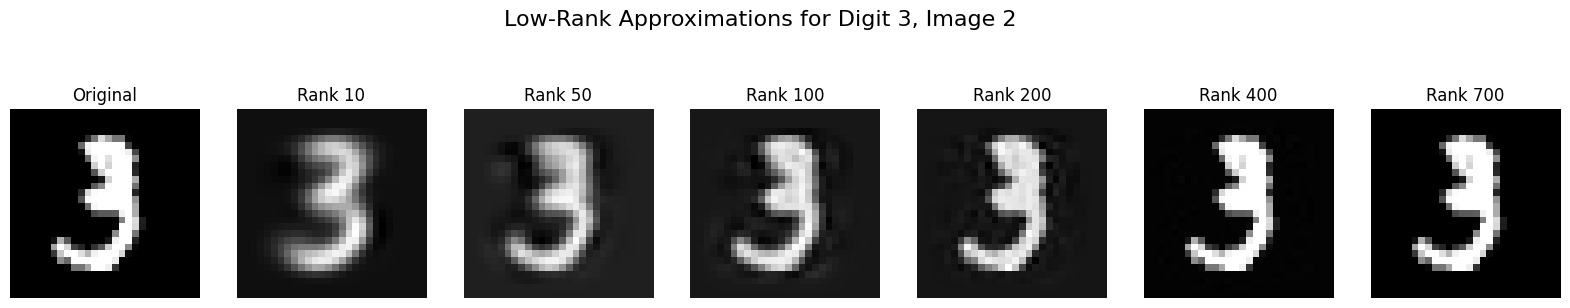

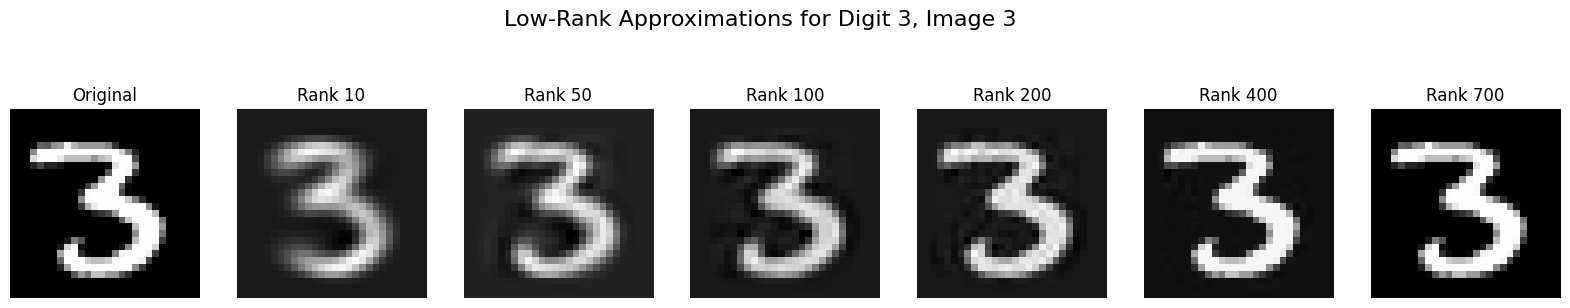

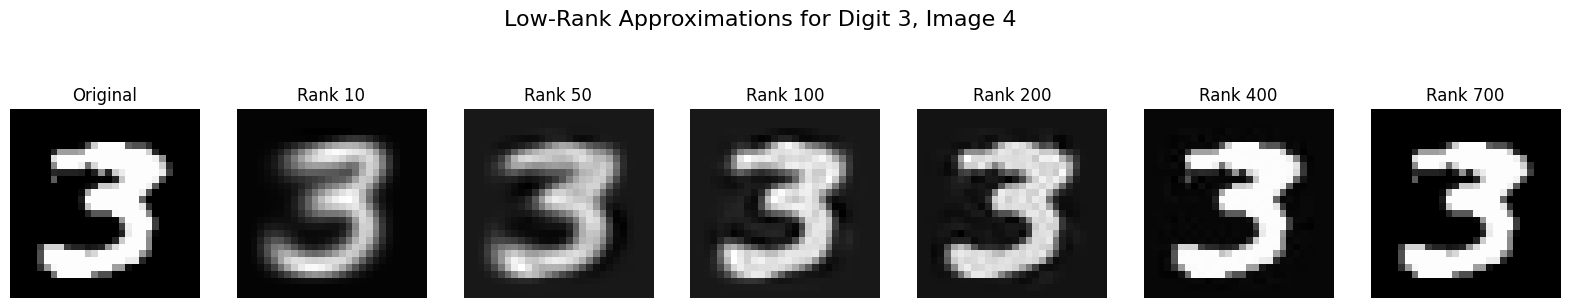

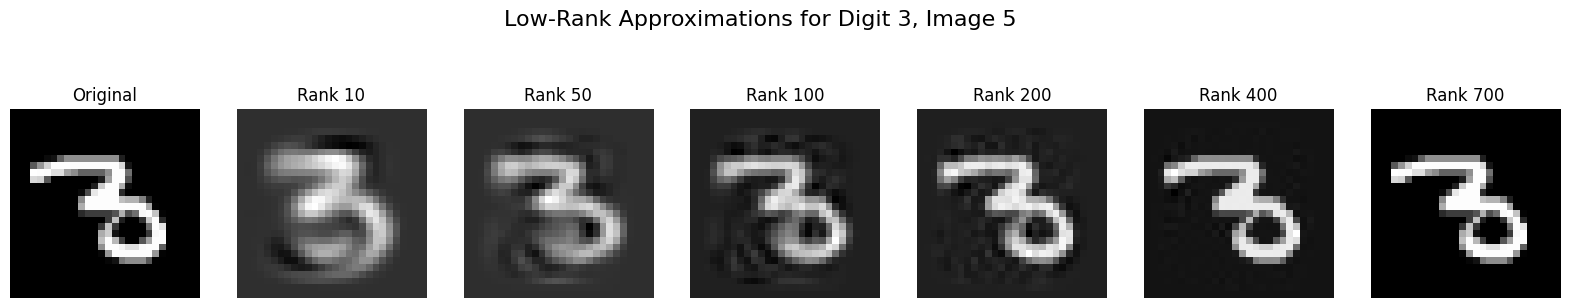

In [40]:
lowRankappx(3, digit_matrices)

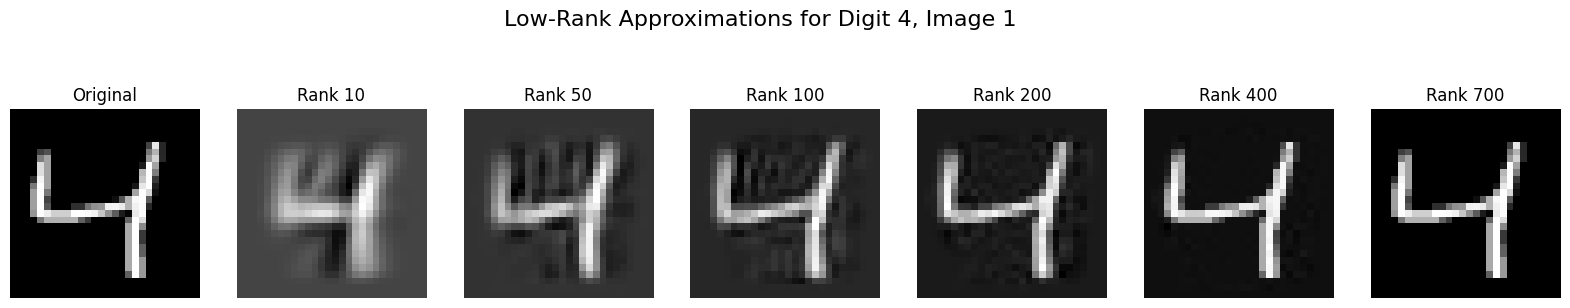

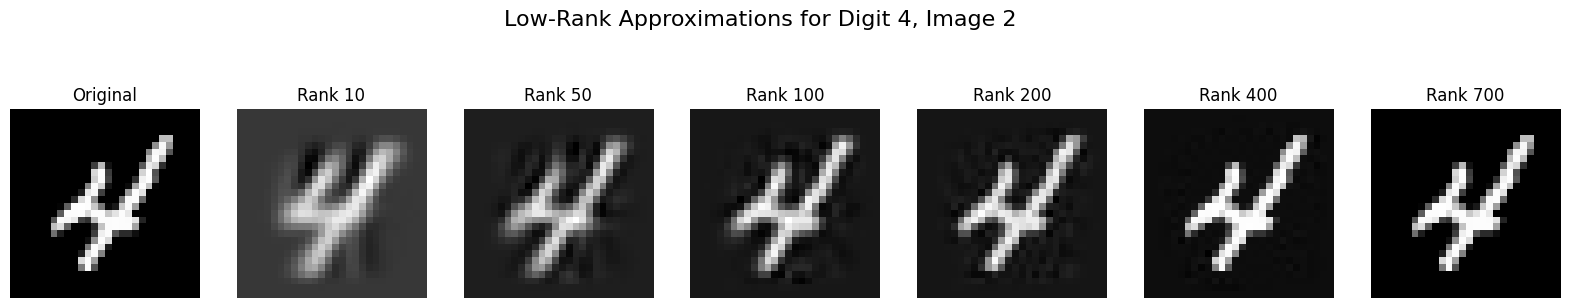

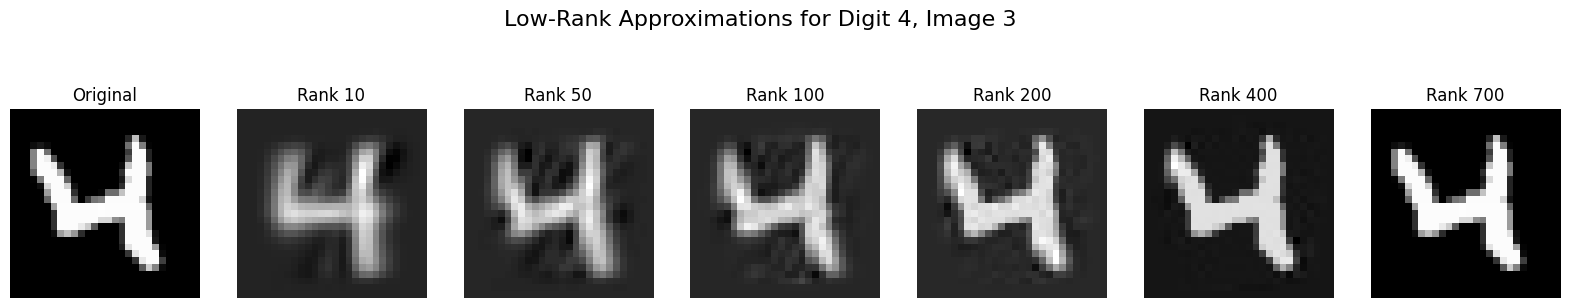

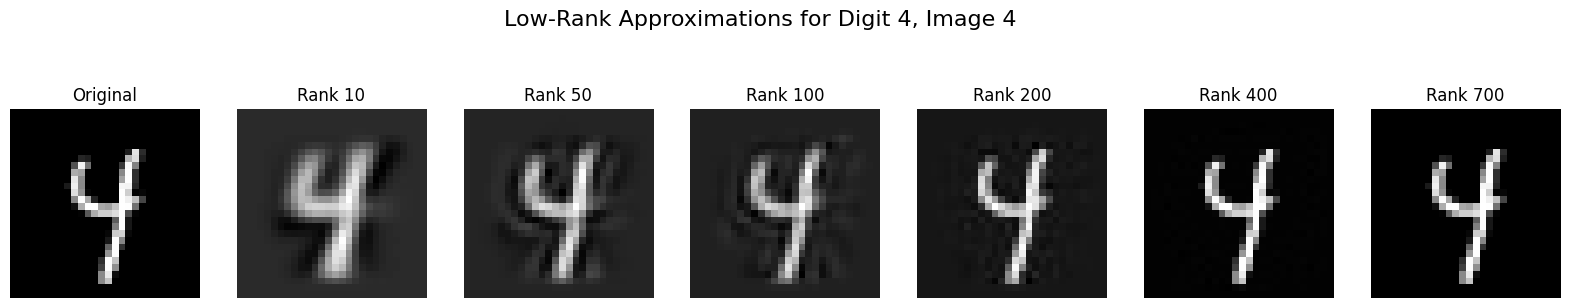

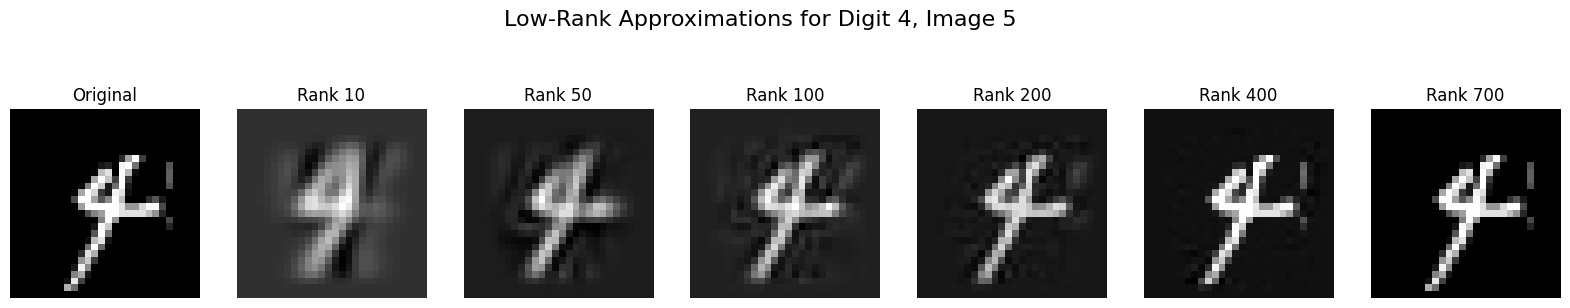

In [41]:
lowRankappx(4, digit_matrices)

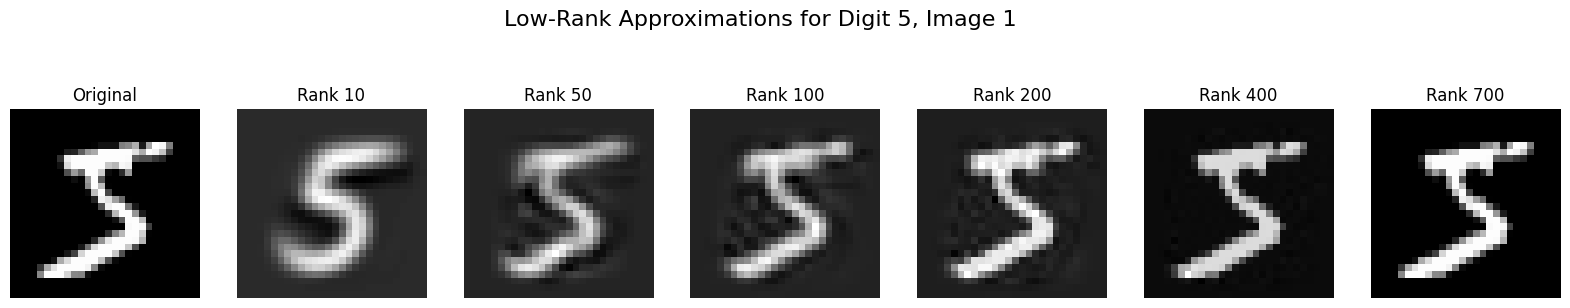

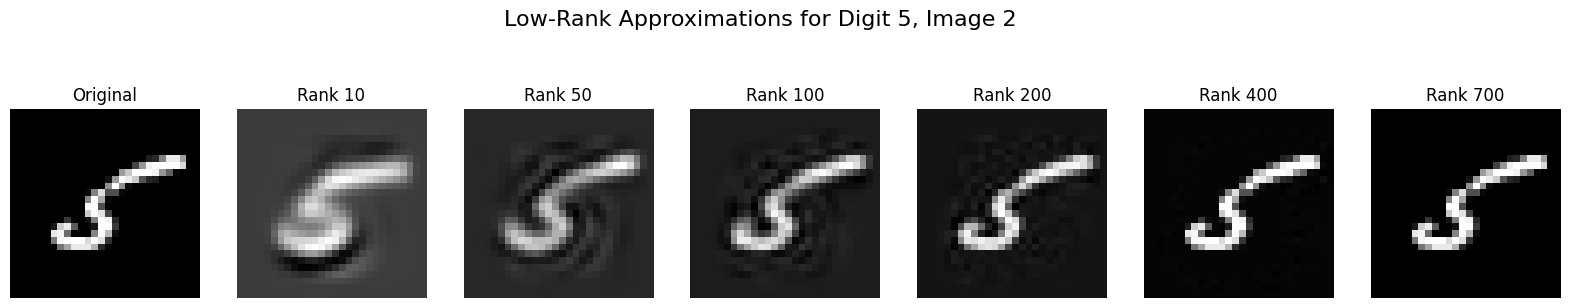

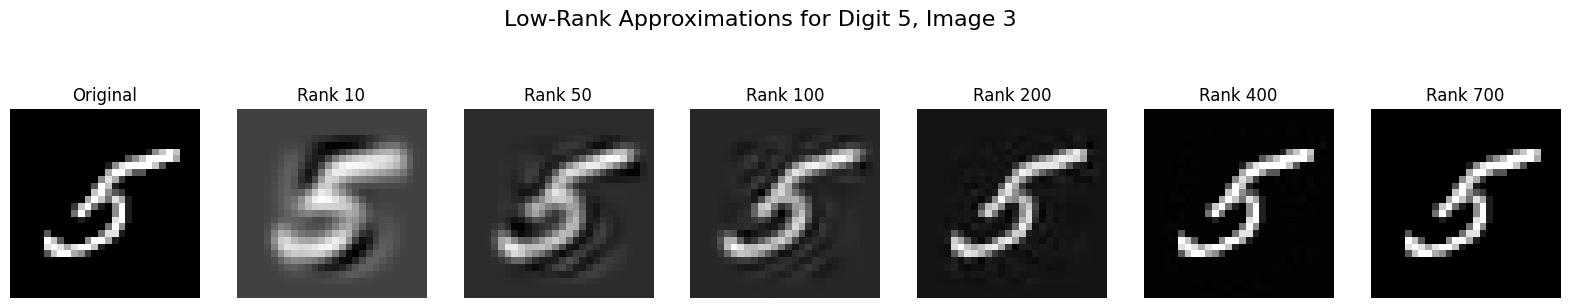

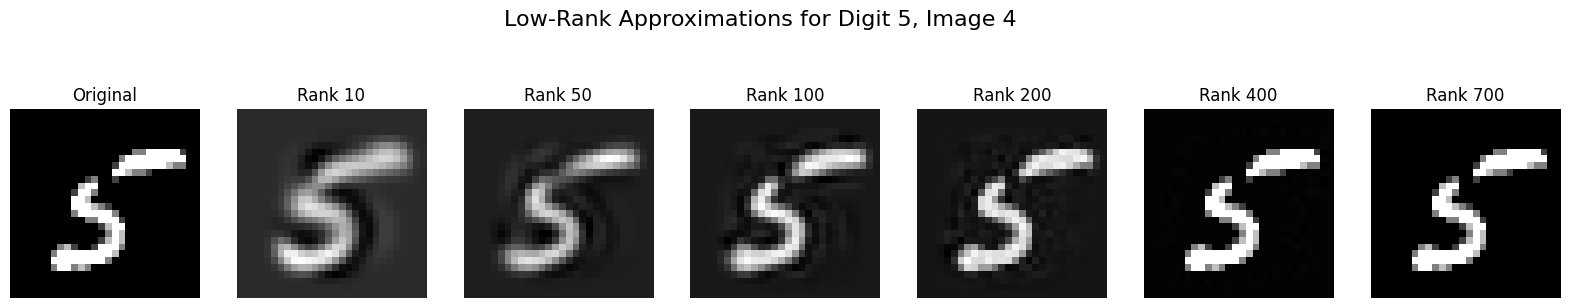

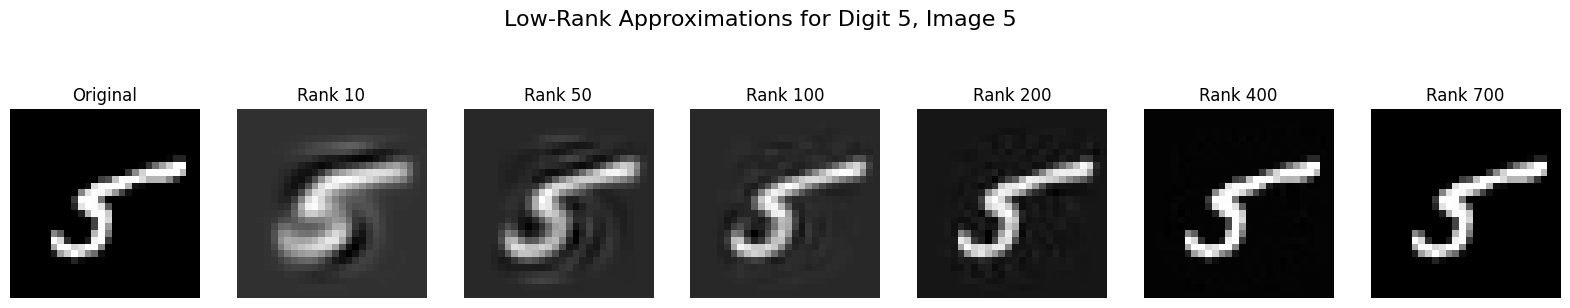

In [42]:
lowRankappx(5, digit_matrices)

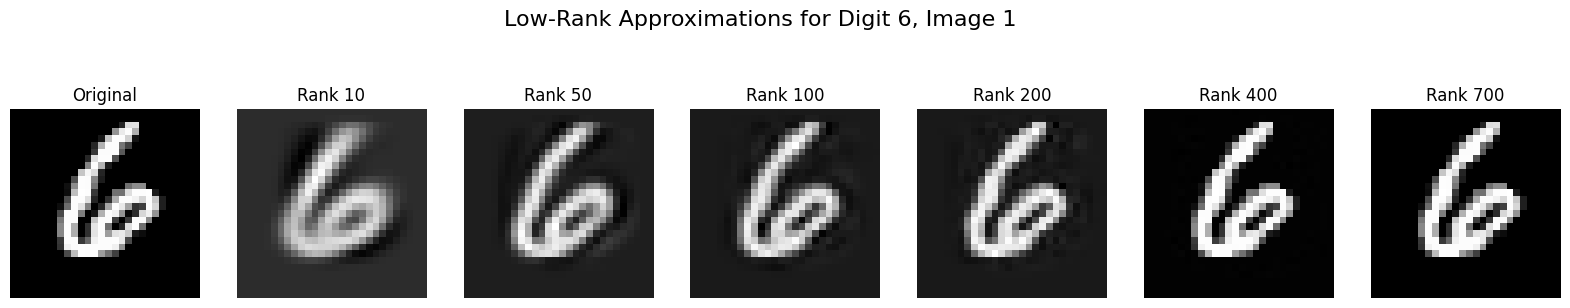

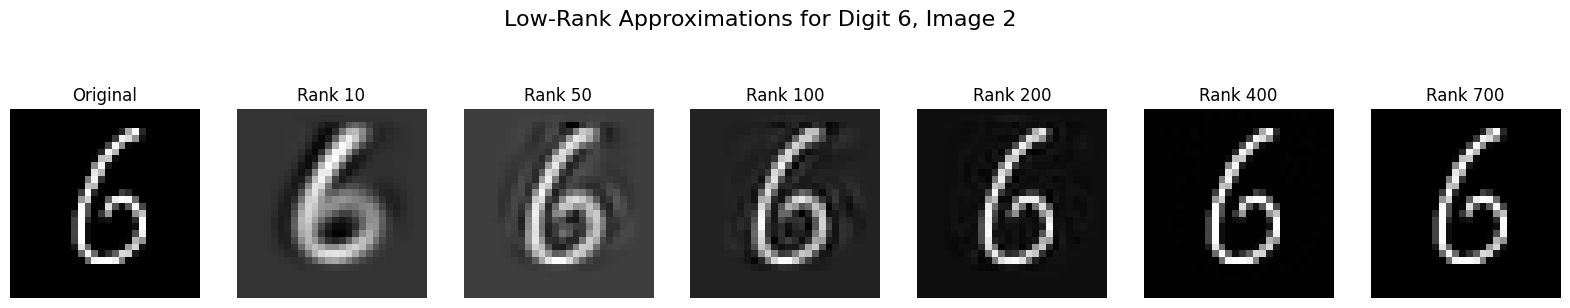

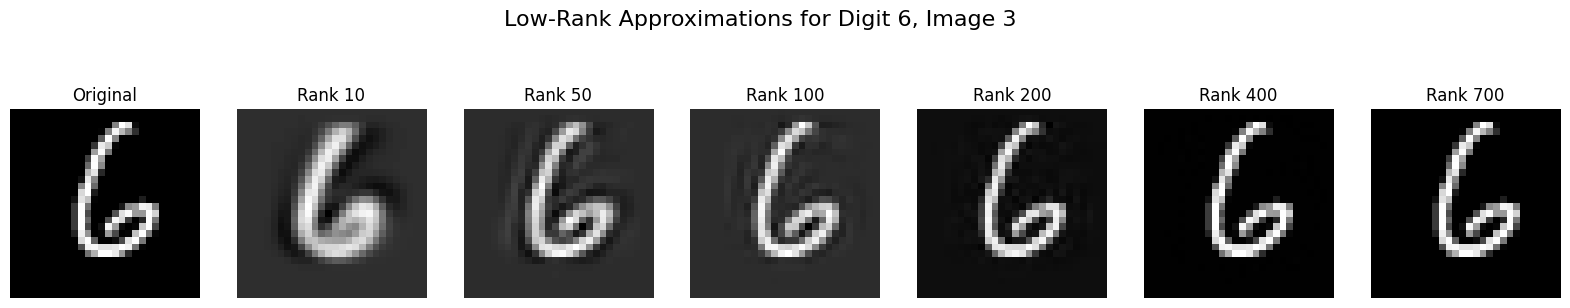

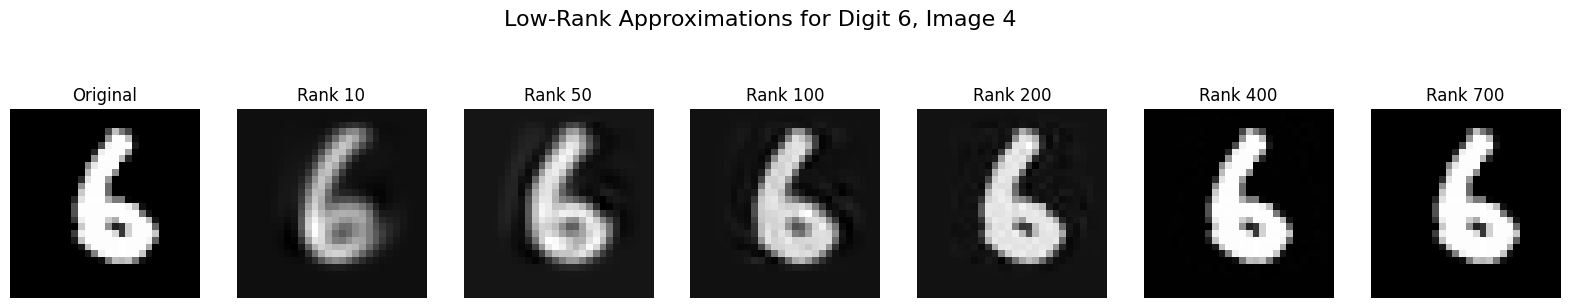

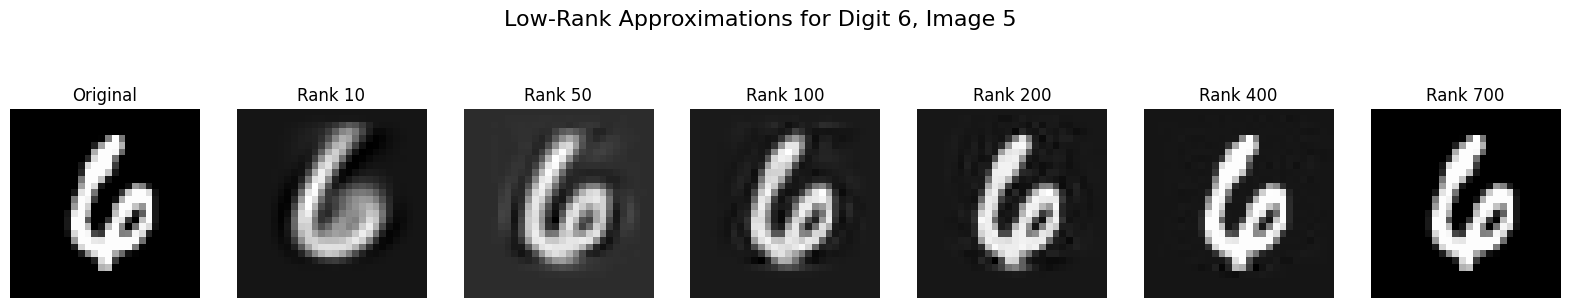

In [43]:
lowRankappx(6, digit_matrices)

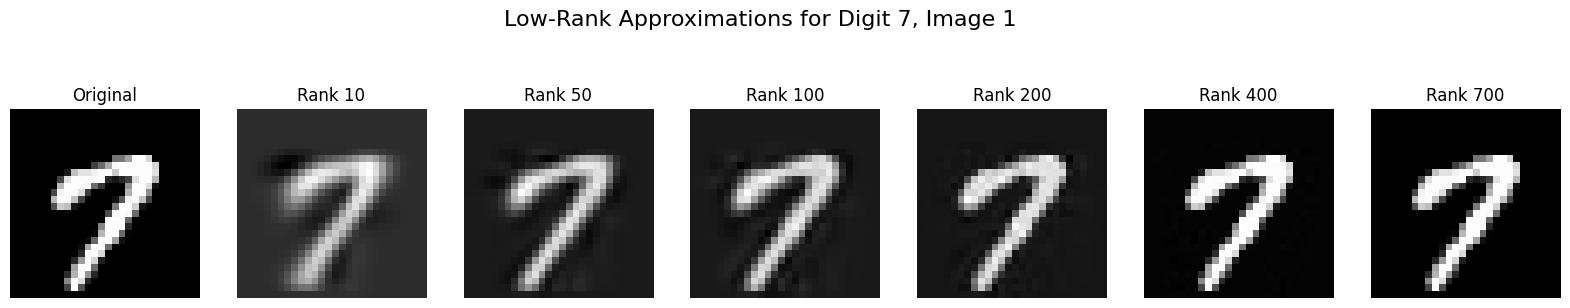

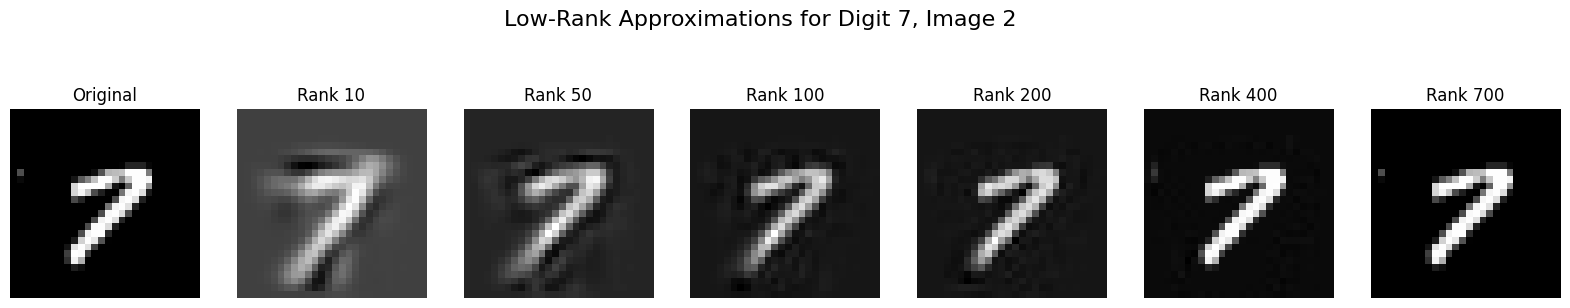

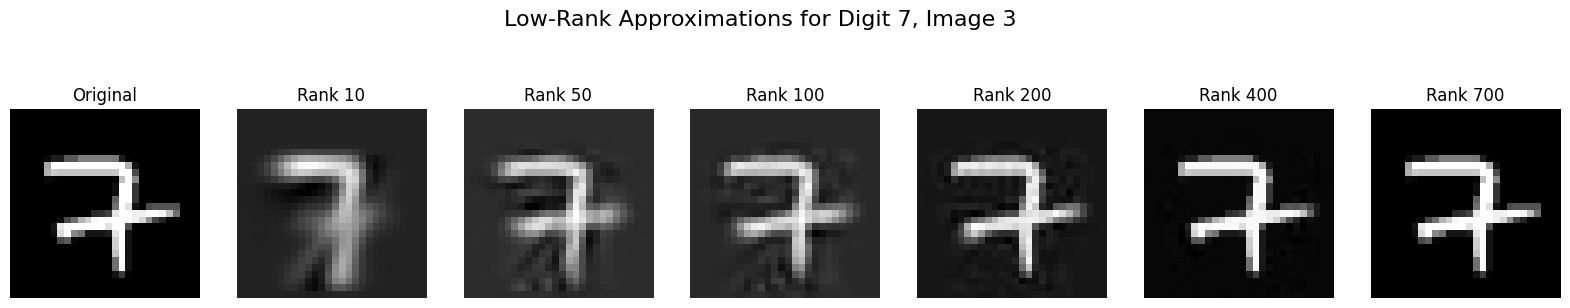

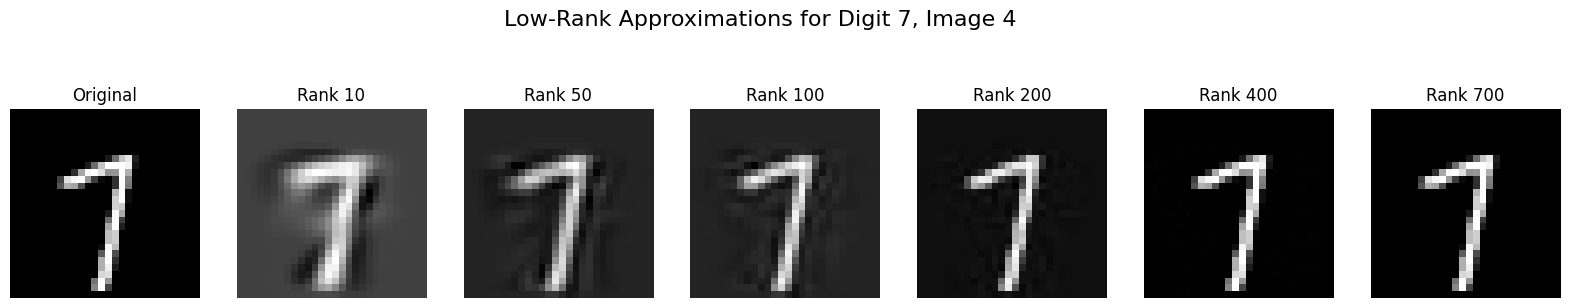

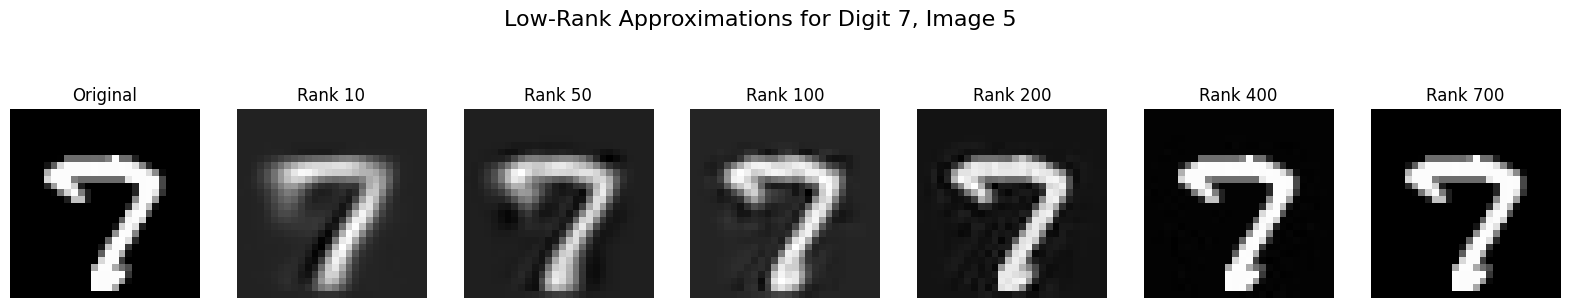

In [44]:
lowRankappx(7, digit_matrices)

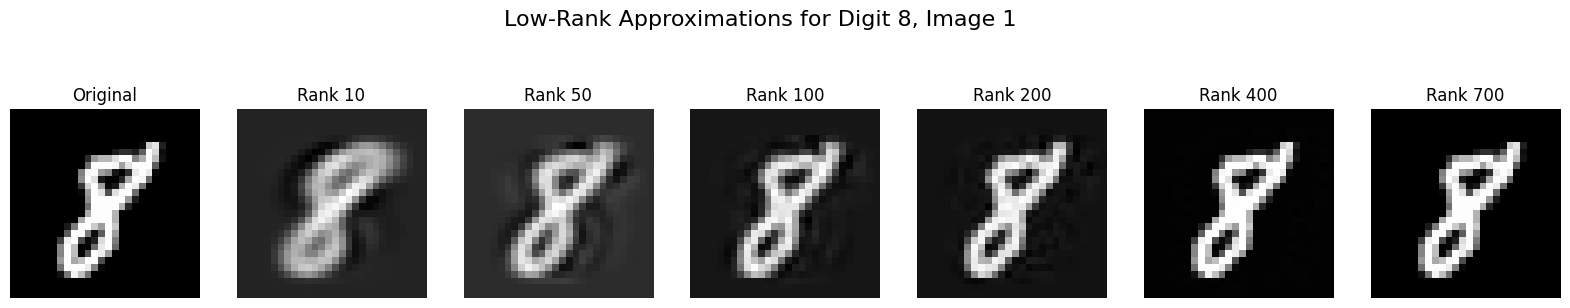

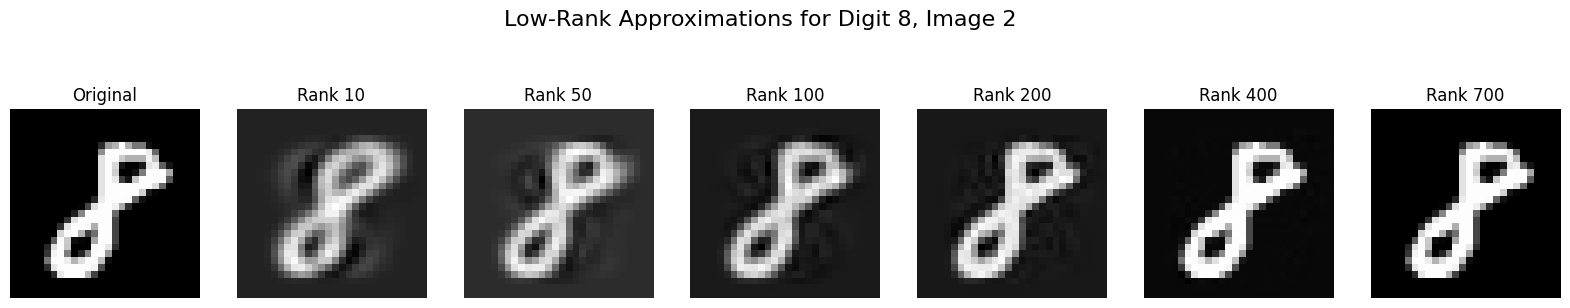

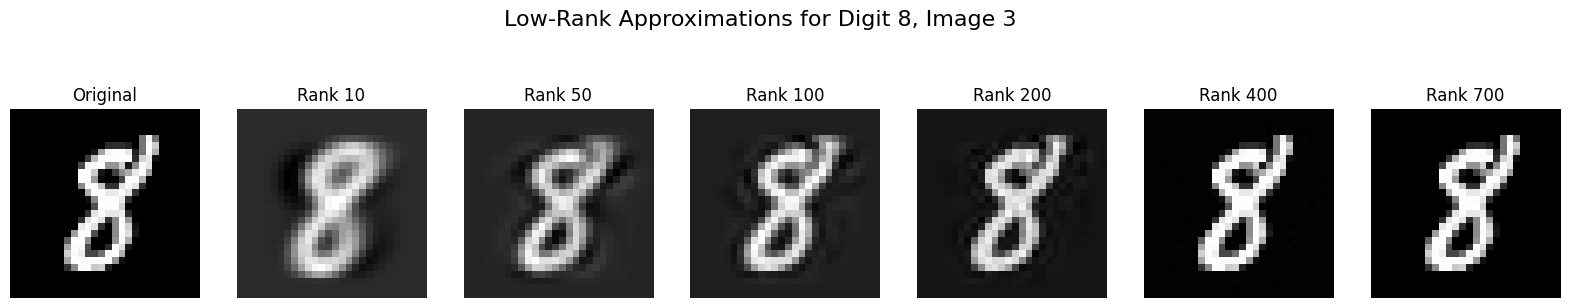

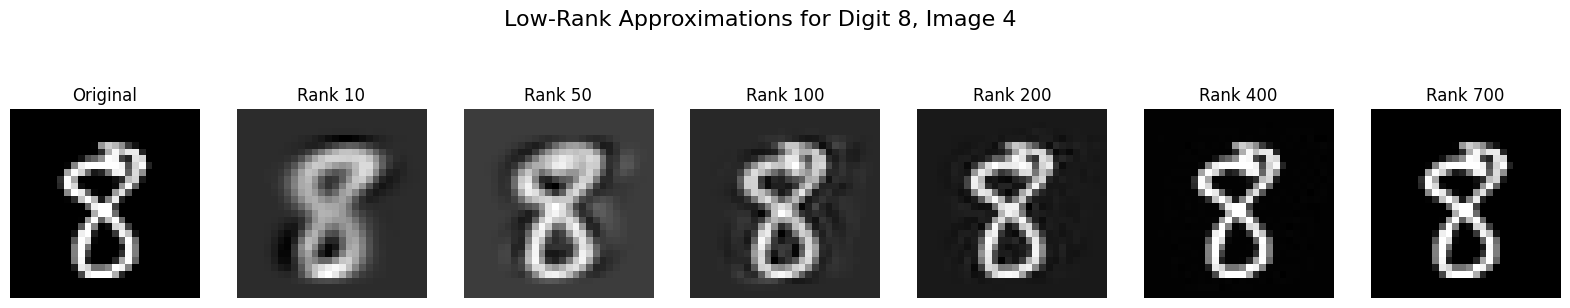

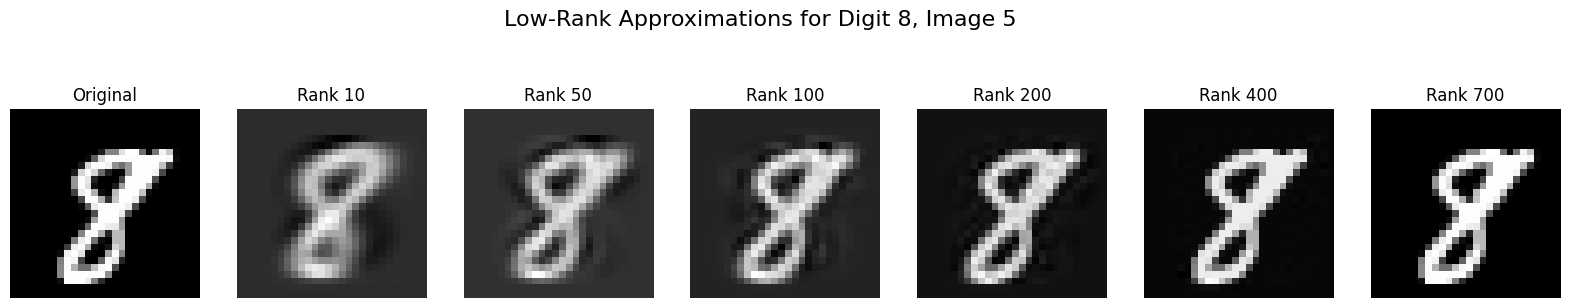

In [45]:
lowRankappx(8, digit_matrices)

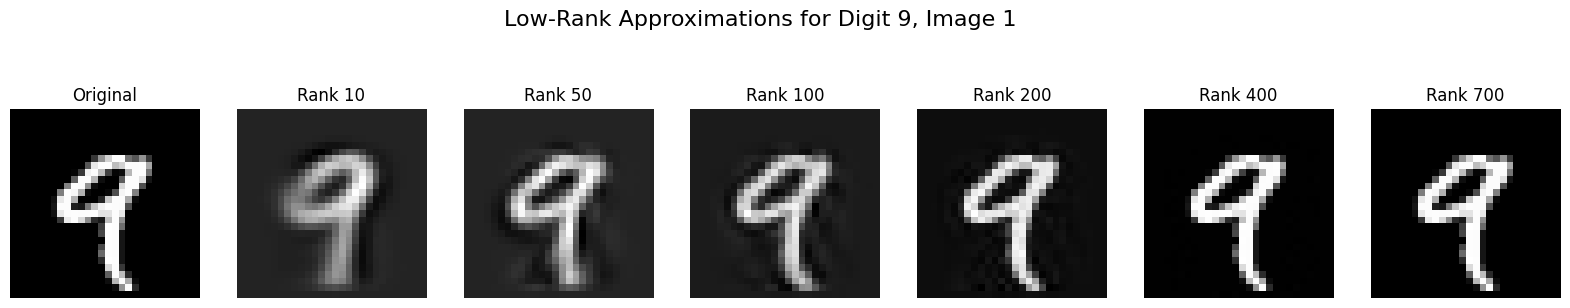

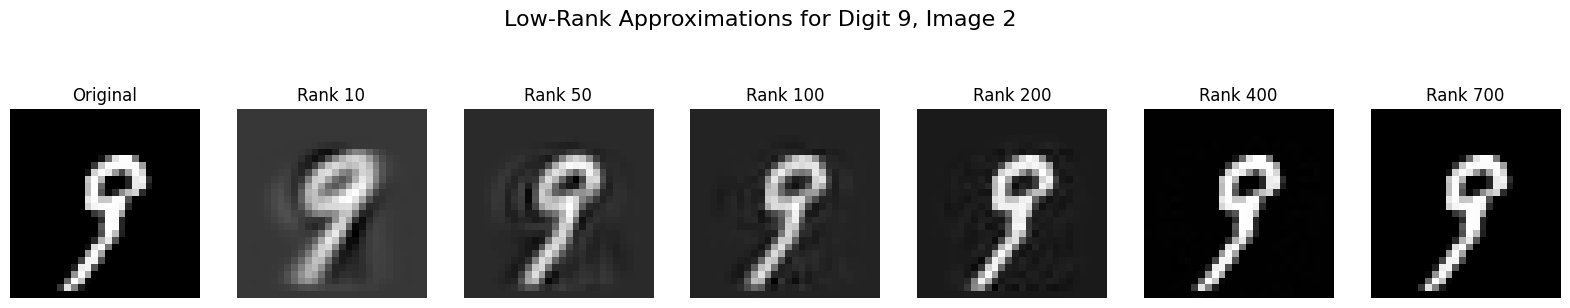

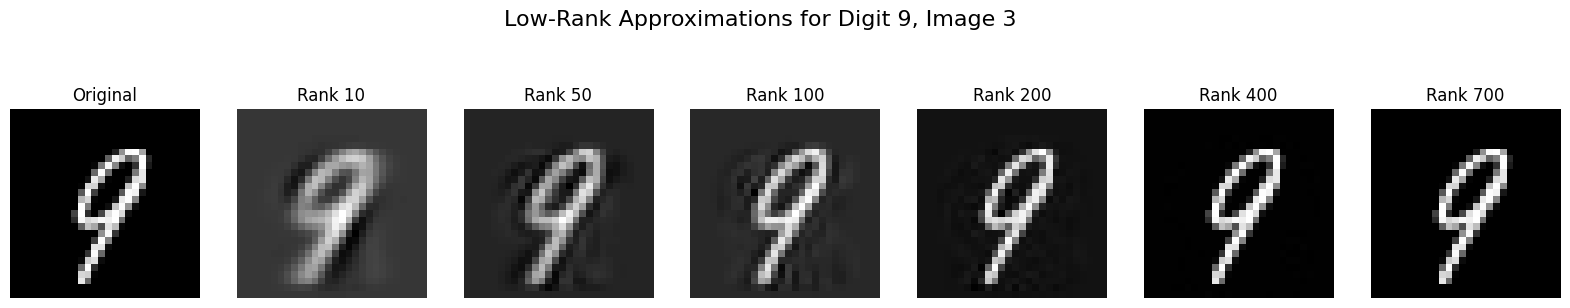

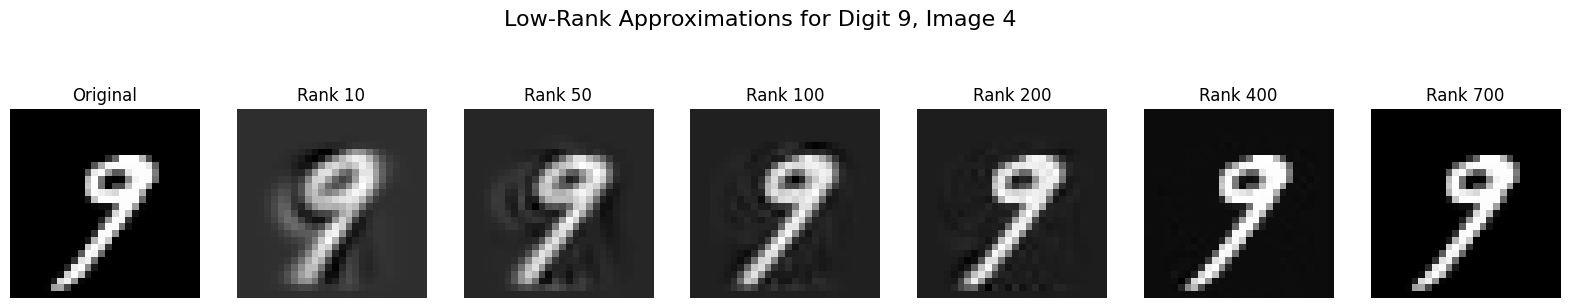

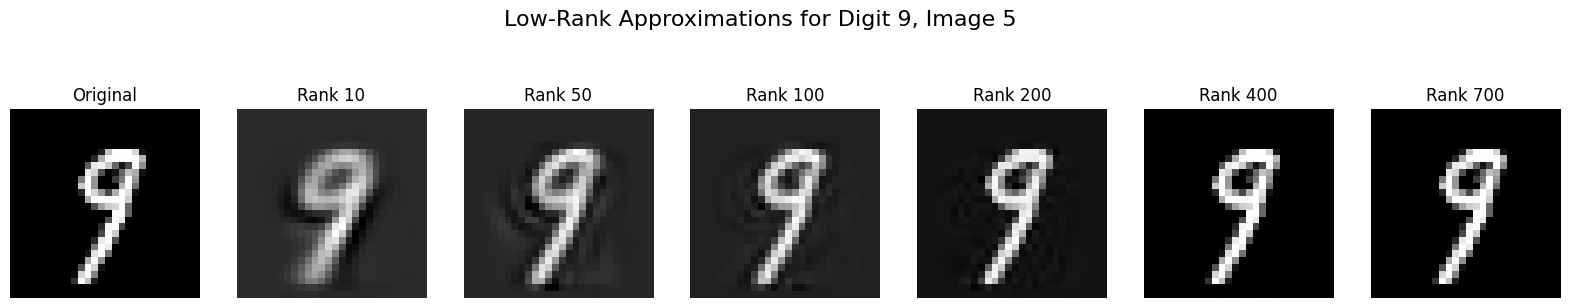

In [46]:
lowRankappx(9, digit_matrices)